## Confounded Cuisiner

Example data challenge. More text

In [1]:
import pandas as pd
from itertools import permutations 
import numpy as np
import re
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram

In [2]:
ingredients_df = pd.read_json('./unlabelled_recipies.json', orient='columns')

In [3]:
ingredients_df.reset_index(drop=True, inplace=True)

In [4]:
ingredients_df

ingredients
0      [pepper, bacon, russet potatoes, sugar, onions...
1      ['rib', 'carrots', 'leeks', 'unsalted butter',...
2      [orzo, garlic, heavy cream, white wine, spinac...
3      ['garlic', 'ginger', 'fish sauce', 'chayotes',...
4      [onions, avocado, salt, coconut cream, cumin s...
...                                                  ...
39769  [large eggs, fresh parsley leaves, heavy cream...
39770  [dried oregano, wheat flour, canola oil, olive...
39771  [eggs, green chilies, salt, monterey jack, flo...
39772  ['paprika', 'vegetable oil', 'salt', 'ground g...
39773  [apricot nectar, salt, garlic powder, pork cho...

[39774 rows x 1 columns]

Some of the ingredients lists are strings - that needs to be fixed.

In [5]:
index_str = list()

for index, row in ingredients_df.iterrows():
    if type(row[0]) is str:
        temp_lst = row[0].split(", ")
        temp_lst = [x.strip('"').strip('[').strip(']').strip("'") for x in temp_lst]
        ingredients_df.ingredients[index] = temp_lst
        index_str.append(index)

print(len(index_str))

3979


In [6]:
regex = re.compile('[^a-zA-Z]')
temp_ing_lst = list()

for i, row in enumerate(ingredients_df['ingredients']):
    ingred_list_processed = list()
    
    for term in row:
        temp = regex.sub('',term).lower()
        ingred_list_processed.append(temp)
        
#     ingred_no_repeats = list(set(ingred_list_processed))
    temp_ing_lst.append(ingred_list_processed)

ingredients_df['ing_lower_alpha'] = temp_ing_lst

In [7]:
regex = re.compile('([^\s\w]|_)+')
temp_ing_lst = list()

for i, row in enumerate(ingredients_df['ingredients']):
    ingred_list_processed = list()
    
    for term in row:
        temp = regex.sub('',term).lower()
        ingred_list_processed.append(temp)
        
#     ingred_no_repeats = list(set(ingred_list_processed))
    temp_ing_lst.append(ingred_list_processed)

ingredients_df['ing_lower_alpha_wSpace'] = temp_ing_lst

In [8]:
ingredients_df['ingredients_string'] = ingredients_df.ing_lower_alpha.str.join(' ')

In [9]:
ingredients_df['ingredients_string_wSpace'] = ingredients_df.ing_lower_alpha_wSpace.str.join(' ')

In [10]:
ingredients_df

ingredients  \
0      [pepper, bacon, russet potatoes, sugar, onions...   
1      [rib, carrots, leeks, unsalted butter, finely ...   
2      [orzo, garlic, heavy cream, white wine, spinac...   
3      [garlic, ginger, fish sauce, chayotes, cooking...   
4      [onions, avocado, salt, coconut cream, cumin s...   
...                                                  ...   
39769  [large eggs, fresh parsley leaves, heavy cream...   
39770  [dried oregano, wheat flour, canola oil, olive...   
39771  [eggs, green chilies, salt, monterey jack, flo...   
39772  [paprika, vegetable oil, salt, ground ginger, ...   
39773  [apricot nectar, salt, garlic powder, pork cho...   

                                         ing_lower_alpha  \
0      [pepper, bacon, russetpotatoes, sugar, onions,...   
1      [rib, carrots, leeks, unsaltedbutter, finelych...   
2      [orzo, garlic, heavycream, whitewine, spinach,...   
3      [garlic, ginger, fishsauce, chayotes, cookingo...   
4      [onions, avocado, salt, coconutcream, cuminsee...   
...                                                  ...   
39769  [largeeggs, freshparsleyleaves, heavycream, br...   
39770  [driedoregano, wheatflour, canolaoil, oliveoil...   
39771  [eggs, greenchilies, salt, montereyjack, flour...   
39772  [paprika, vegetableoil, salt, groundginger, wa...   
39773  [apricotnectar, salt, garlicpowder, porkchops,...   

                                  ing_lower_alpha_wSpace  \
0      [pepper, bacon, russet potatoes, sugar, onions...   
1      [rib, carrots, leeks, unsalted butter, finely ...   
2      [orzo, garlic, heavy cream, white wine, spinac...   
3      [garlic, ginger, fish sauce, chayotes, cooking...   
4      [onions, avocado, salt, coconut cream, cumin s...   
...                                                  ...   
39769  [large eggs, fresh parsley leaves, heavy cream...   
39770  [dried oregano, wheat flour, canola oil, olive...   
39771  [eggs, green chilies, salt, monterey jack, flo...   
39772  [paprika, vegetable oil, salt, ground ginger, ...   
39773  [apricot nectar, salt, garlic powder, pork cho...   

                                      ingredients_string  \
0      pepper bacon russetpotatoes sugar onions gochu...   
1      rib carrots leeks unsaltedbutter finelychopped...   
2      orzo garlic heavycream whitewine spinach eggs ...   
3      garlic ginger fishsauce chayotes cookingoil on...   
4      onions avocado salt coconutcream cuminseed tum...   
...                                                  ...   
39769  largeeggs freshparsleyleaves heavycream breadc...   
39770  driedoregano wheatflour canolaoil oliveoil sal...   
39771     eggs greenchilies salt montereyjack flour milk   
39772  paprika vegetableoil salt groundginger water g...   
39773  apricotnectar salt garlicpowder porkchops vege...   

                               ingredients_string_wSpace  
0      pepper bacon russet potatoes sugar onions goch...  
1      rib carrots leeks unsalted butter finely chopp...  
2      orzo garlic heavy cream white wine spinach egg...  
3      garlic ginger fish sauce chayotes cooking oil ...  
4      onions avocado salt coconut cream cumin seed t...  
...                                                  ...  
39769  large eggs fresh parsley leaves heavy cream br...  
39770  dried oregano wheat flour canola oil olive oil...  
39771   eggs green chilies salt monterey jack flour milk  
39772  paprika vegetable oil salt ground ginger water...  
39773  apricot nectar salt garlic powder pork chops v...  

[39774 rows x 5 columns]

In [11]:
ingred_list = ingredients_df.ingredients_string.str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

6670


['salt',
 'onions',
 'oliveoil',
 'water',
 'garlic',
 'sugar',
 'garliccloves',
 'butter',
 'groundblackpepper',
 'allpurposeflour',
 'pepper',
 'vegetableoil',
 'eggs',
 'soysauce',
 'koshersalt',
 'greenonions',
 'tomatoes',
 'largeeggs',
 'carrots',
 'unsaltedbutter',
 'groundcumin',
 'extravirginoliveoil',
 'blackpepper',
 'milk',
 'chilipowder',
 'oil',
 'redbellpepper',
 'purpleonion',
 'scallions',
 'gratedparmesancheese',
 'sesameoil',
 'cornstarch',
 'ginger',
 'bakingpowder',
 'jalapenochilies',
 'driedoregano',
 'choppedcilantrofresh',
 'freshlemonjuice',
 'dicedtomatoes',
 'freshparsley',
 'mincedgarlic',
 'chickenbroth',
 'sourcream',
 'cayennepepper',
 'brownsugar',
 'freshginger',
 'cookingspray',
 'shallots',
 'garlicpowder',
 'lime']

Create a word cloud of all the ingredients in the vocabulary of the ingredient lists.

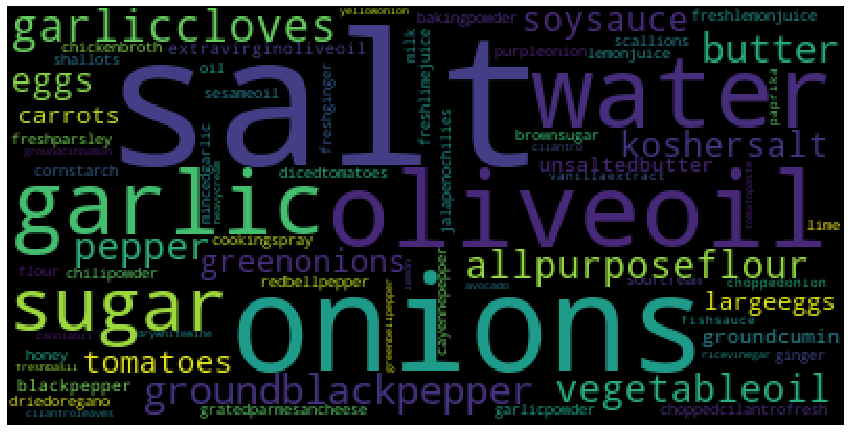

In [12]:
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud.png')

The highest frequency words are not very telling of the type of cuisine that the list may belong to, so we may have to pull these words are address this.

Remove any stop words - there shouldn't be many.

In [13]:
print(len(vocabulary))
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

vocab_no_stops = set(tokens)
print(len(vocab_no_stops))

6670
6667


In [14]:
ingredients_df.ingredients_string_wSpace

0        pepper bacon russet potatoes sugar onions goch...
1        rib carrots leeks unsalted butter finely chopp...
2        orzo garlic heavy cream white wine spinach egg...
3        garlic ginger fish sauce chayotes cooking oil ...
4        onions avocado salt coconut cream cumin seed t...
                               ...                        
39769    large eggs fresh parsley leaves heavy cream br...
39770    dried oregano wheat flour canola oil olive oil...
39771     eggs green chilies salt monterey jack flour milk
39772    paprika vegetable oil salt ground ginger water...
39773    apricot nectar salt garlic powder pork chops v...
Name: ingredients_string_wSpace, Length: 39774, dtype: object

In [15]:
ingred_list_wSpace = ingredients_df.ingredients_string_wSpace.str.cat(sep=' ')
#function to split text into word
tokens_wSpace = word_tokenize(ingred_list_wSpace)
vocabulary_wSpace = set(tokens_wSpace)
print(len(vocabulary_wSpace))
frequency_dist_wSpace = nltk.FreqDist(tokens_wSpace)
sorted(frequency_dist_wSpace,key=frequency_dist_wSpace.__getitem__, reverse=True)[0:10]

3087


['pepper',
 'salt',
 'oil',
 'garlic',
 'ground',
 'fresh',
 'sauce',
 'sugar',
 'onions',
 'cheese']

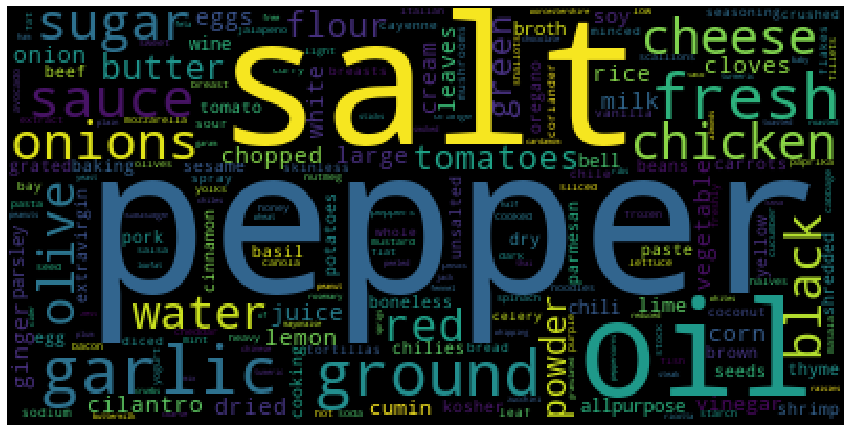

In [16]:
fig = plt.figure(figsize=(15,8))
wordcloud_wSpace = WordCloud().generate_from_frequencies(frequency_dist_wSpace)
plt.imshow(wordcloud_wSpace)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

I think it might be better to not put spaces between words that are part of the same ingredient. It prevents stuff from being broken up, which can be useful. Though, my vocabulary is much larger now.

In [17]:
voc_lst = list(vocabulary)


## Looking for synonyms or similar words
Fuzzy creates a ratio score for comparing words; however, according to the data below, it does not do a great job of ranking similar ingredients. So this is unlikely to be useful.

In [18]:
str2Match = voc_lst[5]
strOptions = voc_lst
Ratios = process.extract(str2Match,strOptions,limit=50,scorer=fuzz.token_sort_ratio)
print(Ratios)
# You can also select the string with the highest matching percentage
highest = process.extractOne(str2Match,strOptions)
print(highest)

[('progressochickenbroth', 100), ('progressoreducedsodiumchickenbroth', 76), ('regularchickenbroth', 75), ('swansonchickenbroth', 75), ('lesssodiumchickenbroth', 74), ('lowersodiumchickenbroth', 73), ('chickenbroth', 73), ('lowsodiumchickenbroth', 71), ('condensedchickenbroth', 71), ('onethirdlesssodiumchickenbroth', 71), ('lowsaltchickenbroth', 70), ('fatfreechickenbroth', 70), ('sodiumfreechickenbroth', 70), ('reducedsodiumchickenbroth', 70), ('organicchickenbroth', 70), ('glutenfreechickenbroth', 70), ('homemadechickenbroth', 68), ('fatfreelesssodiumchickenbroth', 68), ('nonfatchickenbroth', 67), ('bonelesschickenbreast', 67), ('lowfatchickenbroth', 67), ('cannedchickenbroth', 67), ('progressoartichokehearts', 67), ('progressoblackbeans', 65), ('progressodicedtomatoes', 65), ('groundchickenbreast', 65), ('organiclowsodiumchickenbroth', 65), ('sodiumreducedchickenbroth', 65), ('fatfreelowsodiumchickenbroth', 65), ('lesssodiumfatfreechickenbroth', 64), ('storeboughtlowsodiumchickenbro

In [19]:
len(ingredients_df['ingredients'])

39774

Make a column of how many ingredients there are in each list.

This is not really necessary - can skip in publish

In [21]:
length_lst = list()

for index, row in ingredients_df.iterrows():
    length_lst.append(len(row[1]))

ingredients_df['num_of_ingred'] = length_lst

Try TF-IDF with the ingredients with spaces

In [22]:
vectorizer_wSpace = TfidfVectorizer()
vectors_wSpace = vectorizer_wSpace.fit_transform(ingredients_df.ingredients_string_wSpace)
print(vectors_wSpace.shape)

(39774, 3073)


Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters


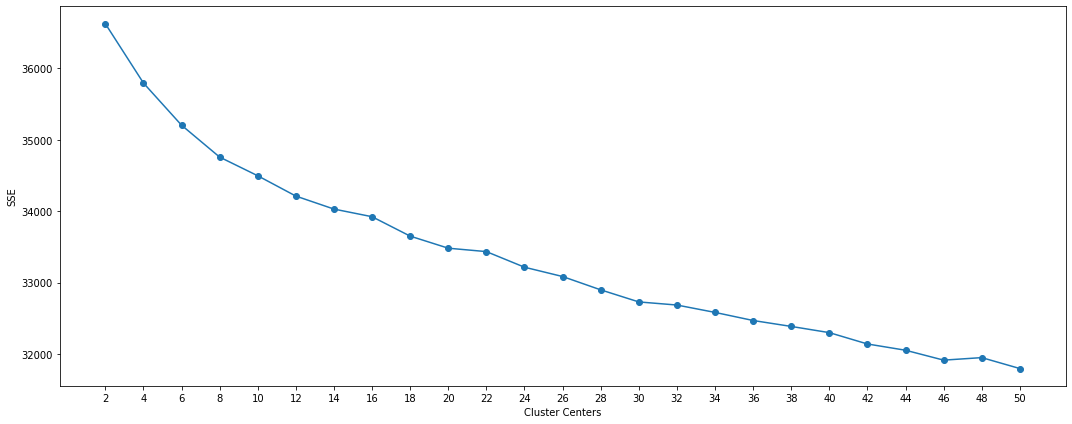

In [24]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1, figsize=(15,6))
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
#     ax.set_title('SSE by Cluster Center Plot')
    plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=24)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=24)
    plt.tight_layout()
    f.savefig('TF-IDF_optimalClusters.png')
    
find_optimal_clusters(vectors_wSpace, 50)

In [29]:
clusters = MiniBatchKMeans(n_clusters=4, init_size=1024, batch_size=2048, random_state=20).fit_predict(vectors_wSpace)

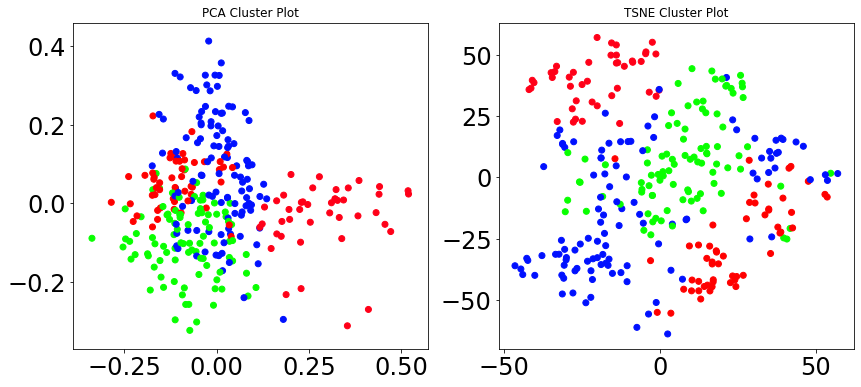

In [30]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=3).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(vectors_wSpace, clusters)

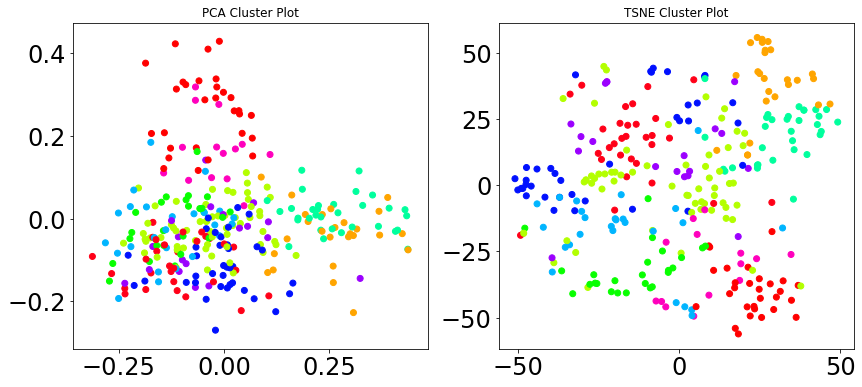

In [41]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
    f.savefig('PCACluster_TSNECluster.png')
    
plot_tsne_pca(vectors_wSpace, clusters)

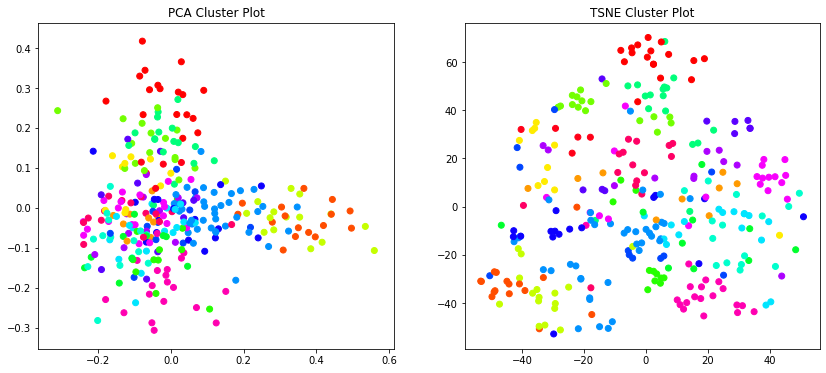

In [28]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=4).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(vectors_wSpace, clusters)

In [31]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=10000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
    f.savefig('PCACluster_TSNECluster.png')
    
plot_tsne_pca(vectors_wSpace, clusters)

KeyboardInterrupt: 

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters


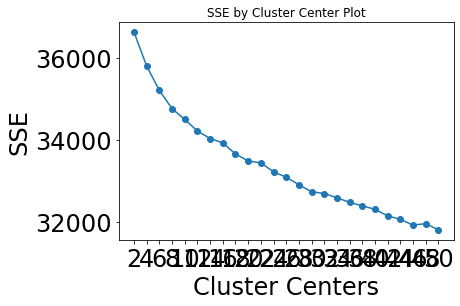

In [33]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(vectors_wSpace, 50)

In [31]:
vectorizer_wSpace = TfidfVectorizer()
vectors_wSpace = vectorizer_wSpace.fit_transform(ingredients_df.ingredients_string_wSpace.sample(frac=0.5))
print(vectors_wSpace.shape)

(19887, 2713)


In [32]:
clustering = DBSCAN(eps=1, min_samples=8).fit(vectors_wSpace)

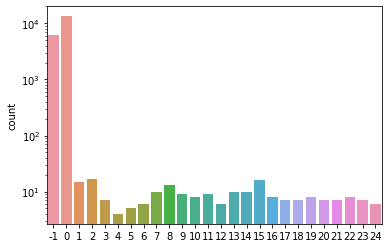

In [33]:
sns.countplot(list(clustering.labels_))
plt.yscale('log')

In [34]:
import scipy

In [36]:
vectorizer_wSpace = TfidfVectorizer()
vectors_wSpace = vectorizer_wSpace.fit_transform(ingredients_df.ingredients_string_wSpace.sample(frac=0.25))
print(vectors_wSpace.shape)

vectors_wSpace_full = vectors_wSpace.toarray()

(9944, 2293)


In [121]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward')
cluster.fit_predict(vectors_wSpace_full)

KeyboardInterrupt: 

In [65]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_
    print('got the children')
    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])
    print('here1')
    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)
    print('here2')
    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    print('here3')
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [66]:
cluster.children_.shape

(397, 2)

got the children
here1
here2
here3


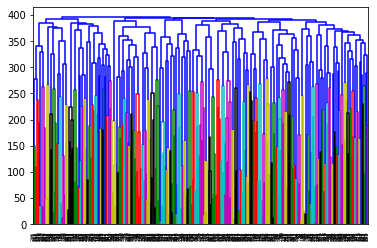

In [67]:
plot_dendrogram(cluster)

In [114]:
vectors_wSpace_full.shape

(199, 643)

## Try hierarchical clustering

In [37]:
vectorizer_wSpace = TfidfVectorizer()
resampled_df = pd.DataFrame(ingredients_df.sample(frac=0.25))
vectors_wSpace = vectorizer_wSpace.fit_transform(resampled_df.ingredients_string)
print(vectors_wSpace.shape)

vectors_wSpace_full = vectors_wSpace.toarray()

(9944, 4409)


In [38]:
from scipy.spatial.distance import pdist

Y = pdist(vectors_wSpace_full, 'cosine')

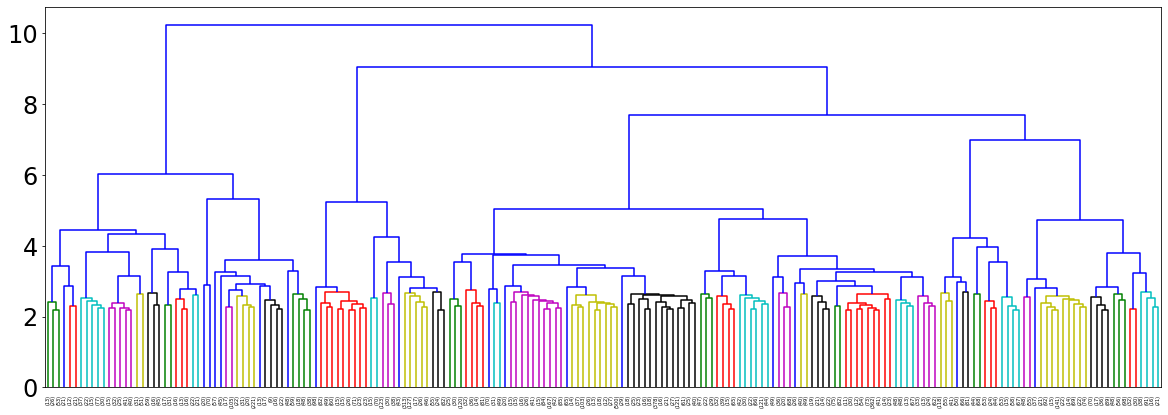

<Figure size 432x288 with 0 Axes>

In [39]:
from scipy.cluster.hierarchy import dendrogram, ward
from matplotlib import pyplot as plt

Z = ward(Y)

# linked = linkage(vectors_wSpace_full, 'ward', optimal_ordering=True)

plt.figure(figsize=(20, 7))
dendrogram(Z,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True,
            color_threshold=2.75,
            p=200,
            truncate_mode='lastp')
plt.show()
plt.savefig('hier_full_wSpace.png')

In [40]:
Z

array([[3.66400000e+03, 9.31600000e+03, 0.00000000e+00, 2.00000000e+00],
       [5.15500000e+03, 6.01800000e+03, 0.00000000e+00, 2.00000000e+00],
       [9.07900000e+03, 9.94500000e+03, 0.00000000e+00, 3.00000000e+00],
       ...,
       [1.98790000e+04, 1.98830000e+04, 7.69875620e+00, 6.75900000e+03],
       [1.98800000e+04, 1.98840000e+04, 9.05335092e+00, 8.23000000e+03],
       [1.98820000e+04, 1.98850000e+04, 1.02382960e+01, 9.94400000e+03]])

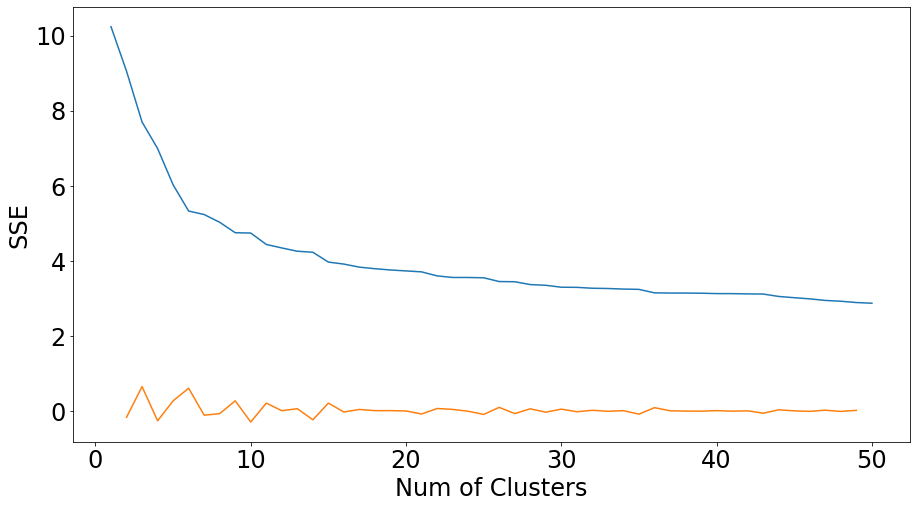

clusters: 3


<Figure size 432x288 with 0 Axes>

In [42]:
fig = plt.figure(figsize=(15,8))

last = Z[-50:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)

plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]


plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.ylabel('SSE')
plt.xlabel('Num of Clusters')
plt.show()
plt.savefig('hier_full_wSpace_elbow.png')
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

In [43]:
from scipy.cluster.hierarchy import inconsistent

depth = 6
incons = inconsistent(Z, depth)
incons[-10:]

array([[ 1.8684029 ,  0.76344258, 63.        ,  3.76153783],
       [ 1.99107495,  0.84499585, 63.        ,  3.26293643],
       [ 2.38354925,  0.90042306, 63.        ,  2.93555977],
       [ 1.80067134,  0.87308741, 63.        ,  3.931395  ],
       [ 1.57110494,  0.95475028, 59.        ,  3.93322483],
       [ 2.16654004,  1.17760778, 63.        ,  3.27655301],
       [ 2.33761918,  0.95489506, 63.        ,  4.87569551],
       [ 2.95826886,  1.11969449, 63.        ,  4.23373284],
       [ 3.01558612,  1.49149121, 63.        ,  4.04813971],
       [ 3.33780271,  1.81106115, 63.        ,  3.81019344]])

In [66]:
from scipy.cluster.hierarchy import fcluster
max_d = 2.75
clusters = fcluster(Z, 10, criterion='maxclust')
clusters

array([10,  6,  1, ...,  6,  8, 10], dtype=int32)

In [67]:
resampled_df['cluster'] = list(clusters)

In [68]:
resampled_df

ingredients  \
35016  [dried oregano, yellow onion, water, freshly g...   
10578  [garlic, chorizo sausage, ground cumin, ale, o...   
1594   [lemon, large eggs, mayonaise, ice water, larg...   
18536  [ground nutmeg, cayenne pepper, yellow corn me...   
8200   [butter, red wine vinegar, pepper, grated parm...   
...                                                  ...   
25080  [fresh lime juice, jalapeno chilies, purple on...   
32750  [fennel bulb, garlic cloves, olive oil, vegeta...   
33369  [pimentos, shredded cheddar cheese, garlic pow...   
12323  [orzo pasta, lemon zest, kosher salt, red bell...   
36752  [garlic salt, frozen whole kernel corn, cookin...   

                                         ing_lower_alpha  \
35016  [driedoregano, yellowonion, water, freshlygrou...   
10578  [garlic, chorizosausage, groundcumin, ale, oni...   
1594   [lemon, largeeggs, mayonaise, icewater, larges...   
18536  [groundnutmeg, cayennepepper, yellowcornmeal, ...   
8200   [butter, redwinevinegar, pepper, gratedparmesa...   
...                                                  ...   
25080  [freshlimejuice, jalapenochilies, purpleonion,...   
32750  [fennelbulb, garliccloves, oliveoil, vegetable...   
33369  [pimentos, shreddedcheddarcheese, garlicpowder...   
12323  [orzopasta, lemonzest, koshersalt, redbellpepp...   
36752  [garlicsalt, frozenwholekernelcorn, cookingspr...   

                                  ing_lower_alpha_wSpace  \
35016  [dried oregano, yellow onion, water, freshly g...   
10578  [garlic, chorizo sausage, ground cumin, ale, o...   
1594   [lemon, large eggs, mayonaise, ice water, larg...   
18536  [ground nutmeg, cayenne pepper, yellow corn me...   
8200   [butter, red wine vinegar, pepper, grated parm...   
...                                                  ...   
25080  [fresh lime juice, jalapeno chilies, purple on...   
32750  [fennel bulb, garlic cloves, olive oil, vegeta...   
33369  [pimentos, shredded cheddar cheese, garlic pow...   
12323  [orzo pasta, lemon zest, kosher salt, red bell...   
36752  [garlic salt, frozen whole kernel corn, cookin...   

                                      ingredients_string  \
35016  driedoregano yellowonion water freshlygroundpe...   
10578  garlic chorizosausage groundcumin ale onions c...   
1594   lemon largeeggs mayonaise icewater largeshrimp...   
18536  groundnutmeg cayennepepper yellowcornmeal brie...   
8200   butter redwinevinegar pepper gratedparmesanche...   
...                                                  ...   
25080  freshlimejuice jalapenochilies purpleonion whi...   
32750    fennelbulb garliccloves oliveoil vegetablebroth   
33369  pimentos shreddedcheddarcheese garlicpowder ma...   
12323  orzopasta lemonzest koshersalt redbellpepper w...   
36752  garlicsalt frozenwholekernelcorn cookingspray ...   

                               ingredients_string_wSpace  num_of_ingred  \
35016  dried oregano yellow onion water freshly groun...              8   
10578  garlic chorizo sausage ground cumin ale onions...             14   
1594   lemon large eggs mayonaise ice water large shr...              8   
18536  ground nutmeg cayenne pepper yellow corn meal ...              9   
8200   butter red wine vinegar pepper grated parmesan...             10   
...                                                  ...            ...   
25080  fresh lime juice jalapeno chilies purple onion...             12   
32750  fennel bulb garlic cloves olive oil vegetable ...              4   
33369  pimentos shredded cheddar cheese garlic powder...              4   
12323  orzo pasta lemon zest kosher salt red bell pep...              8   
36752  garlic salt frozen whole kernel corn cooking s...              9   

       cluster  
35016       10  
10578        6  
1594         1  
18536        6  
8200         6  
...        ...  
25080        3  
32750        8  
33369        6  
12323        8  
36752       10  

[9944 rows x 7 columns]

In [69]:
resampled_df.cluster.value_counts()

6     2647
8     1449
10    1252
5     1009
9      837
1      818
3      806
7      574
4      462
2       90
Name: cluster, dtype: int64

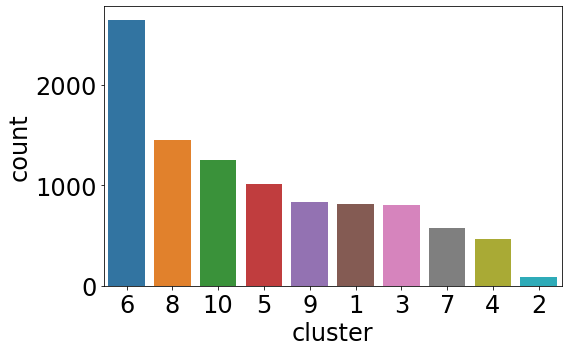

In [70]:
fig = plt.figure(figsize=(8,5))
sns.countplot(resampled_df.cluster, order=resampled_df.cluster.value_counts().index)
plt.tight_layout()
fig.savefig('Cluster_count_full.png')

In [71]:
resampled_df.columns

Index(['ingredients', 'ing_lower_alpha', 'ing_lower_alpha_wSpace',
       'ingredients_string', 'ingredients_string_wSpace', 'num_of_ingred',
       'cluster'],
      dtype='object')

In [72]:
print(resampled_df.ingredients_string)

35016    driedoregano yellowonion water freshlygroundpe...
10578    garlic chorizosausage groundcumin ale onions c...
1594     lemon largeeggs mayonaise icewater largeshrimp...
18536    groundnutmeg cayennepepper yellowcornmeal brie...
8200     butter redwinevinegar pepper gratedparmesanche...
                               ...                        
25080    freshlimejuice jalapenochilies purpleonion whi...
32750      fennelbulb garliccloves oliveoil vegetablebroth
33369    pimentos shreddedcheddarcheese garlicpowder ma...
12323    orzopasta lemonzest koshersalt redbellpepper w...
36752    garlicsalt frozenwholekernelcorn cookingspray ...
Name: ingredients_string, Length: 9944, dtype: object


849


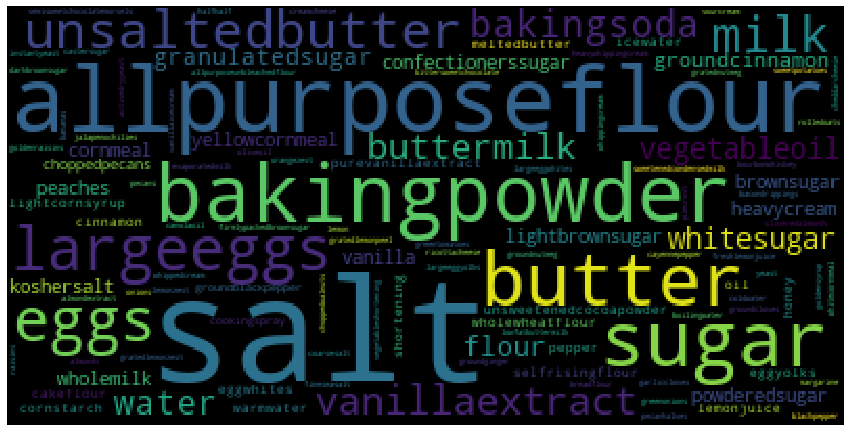

In [73]:
ingred_list = resampled_df.loc[resampled_df.cluster == 1, 'ingredients_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

In [74]:
frequency_dist.most_common(20)

[('salt', 521),
 ('allpurposeflour', 427),
 ('bakingpowder', 313),
 ('sugar', 301),
 ('butter', 267),
 ('largeeggs', 234),
 ('eggs', 231),
 ('unsaltedbutter', 228),
 ('milk', 192),
 ('vanillaextract', 177),
 ('bakingsoda', 165),
 ('buttermilk', 145),
 ('water', 128),
 ('vegetableoil', 102),
 ('whitesugar', 97),
 ('flour', 83),
 ('granulatedsugar', 80),
 ('groundcinnamon', 74),
 ('confectionerssugar', 73),
 ('brownsugar', 67)]

849


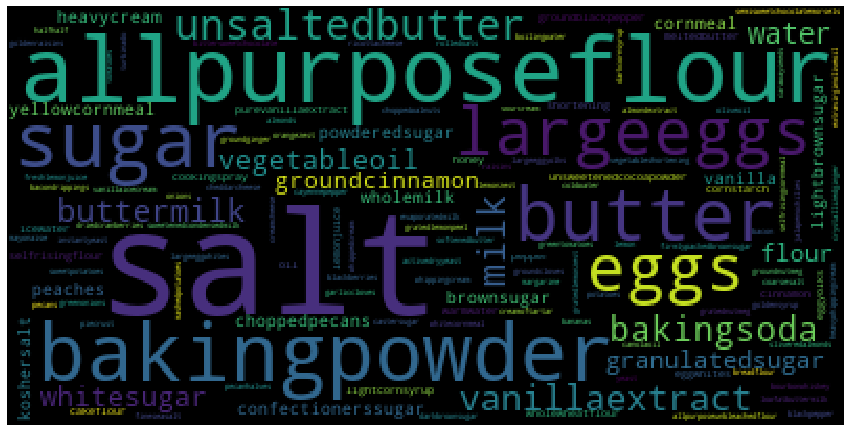

In [75]:
ingred_list = resampled_df.loc[resampled_df.cluster == 1, 'ingredients_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

849


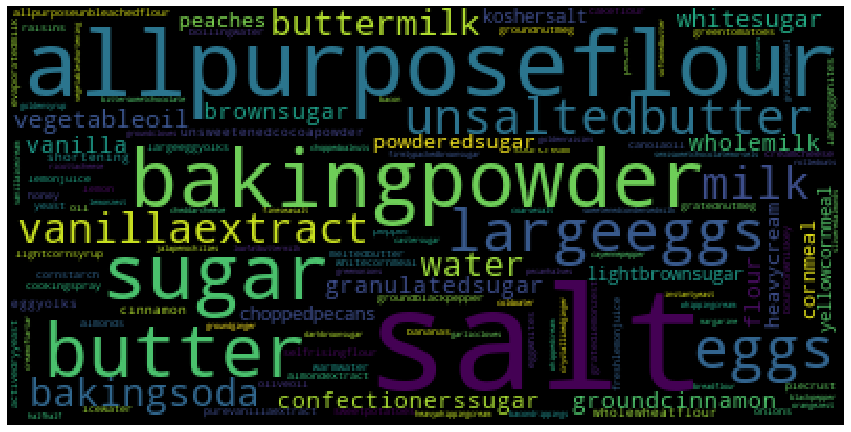

In [76]:
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

849


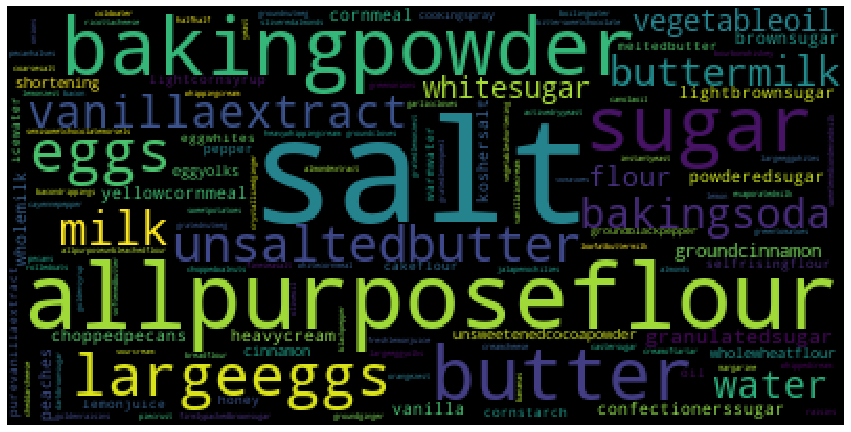

In [77]:
ingred_list = resampled_df.loc[resampled_df.cluster == 1, 'ingredients_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

206


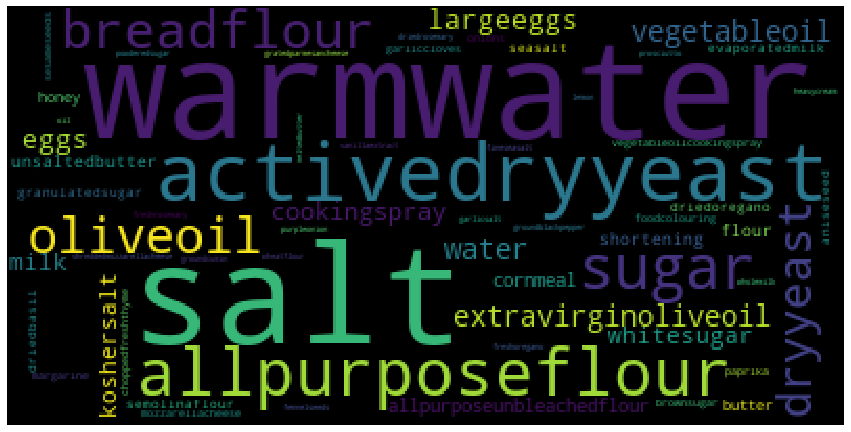

In [78]:
ingred_list = resampled_df.loc[resampled_df.cluster == 2, 'ingredients_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace_3.png')

1170


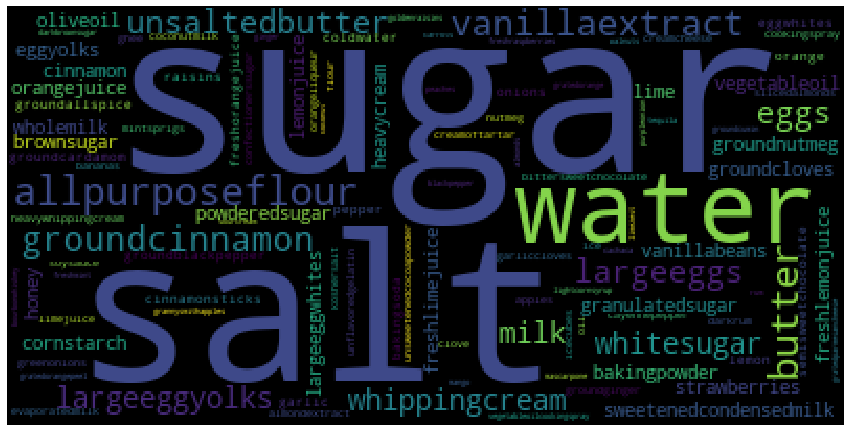

In [79]:
ingred_list = resampled_df.loc[resampled_df.cluster == 3, 'ingredients_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

859


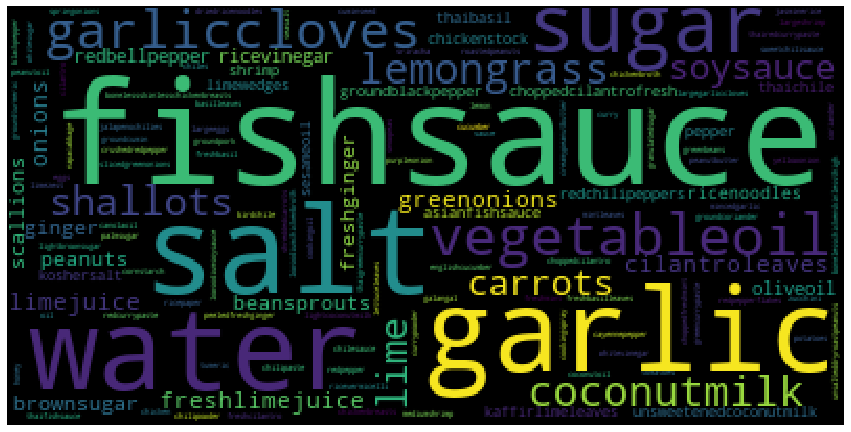

In [80]:
ingred_list = resampled_df.loc[resampled_df.cluster == 4, 'ingredients_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

soysauce
sesameoil
sugar
garlic
salt
1227


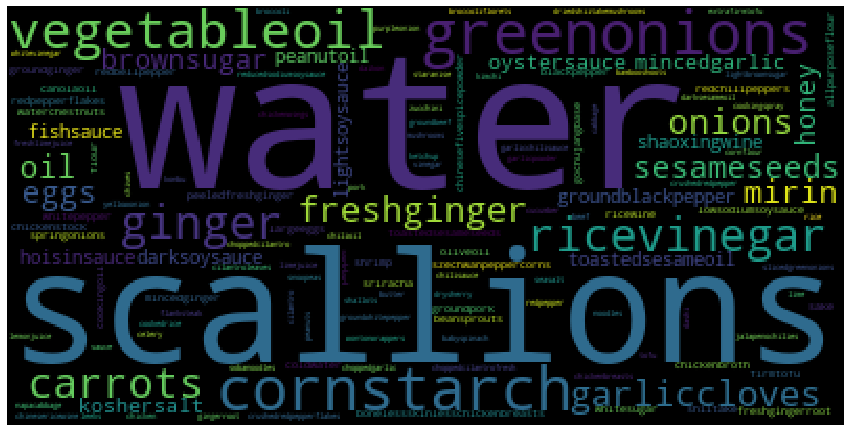

In [81]:
ingred_list = resampled_df.loc[resampled_df.cluster == 5, 'ingredients_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 5 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

salt
onions
oliveoil
water
butter
garlic
groundblackpepper
garliccloves
pepper
allpurposeflour
2553


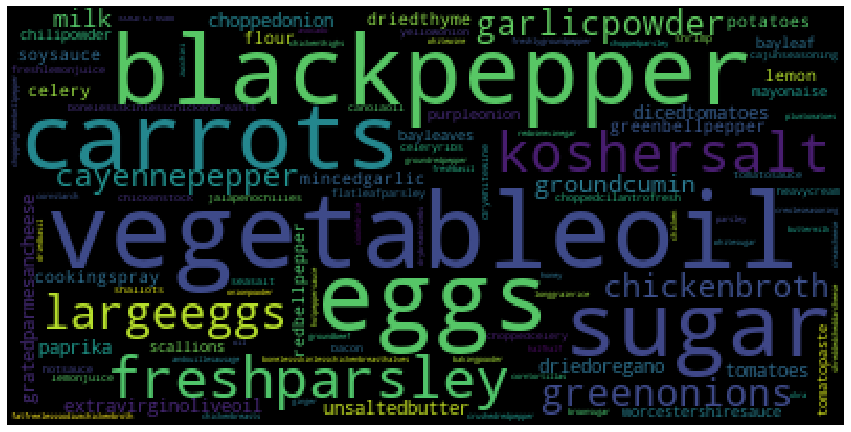

In [83]:
ingred_list = resampled_df.loc[resampled_df.cluster == 6, 'ingredients_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 10 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

salt
oliveoil
garlic
gratedparmesancheese
onions
858


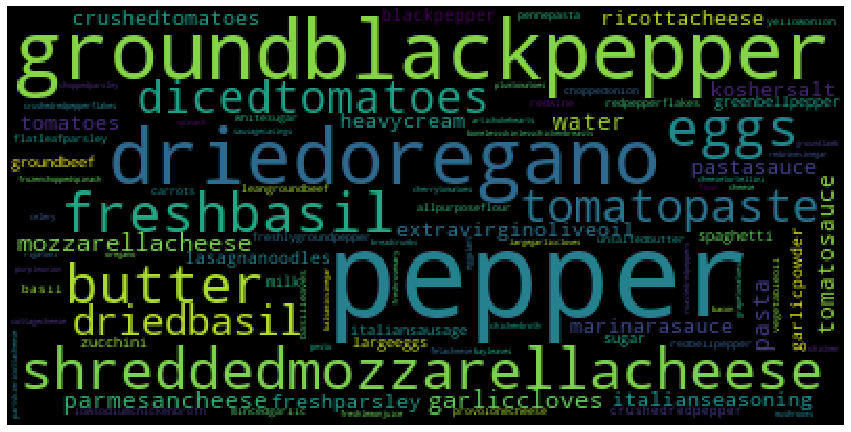

In [85]:
ingred_list = resampled_df.loc[resampled_df.cluster == 7, 'ingredients_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 5 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

1604


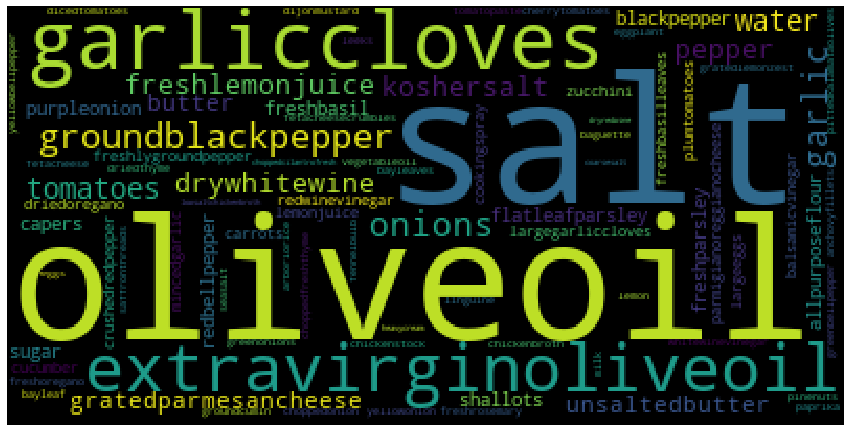

In [86]:
ingred_list = resampled_df.loc[resampled_df.cluster == 8, 'ingredients_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

salt
onions
water
garlic
garammasala
oil
groundcumin
cuminseed
groundturmeric
tomatoes
1154


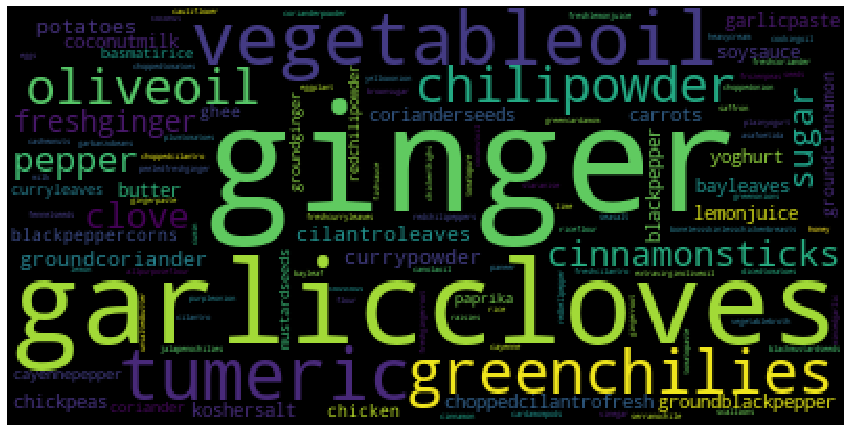

In [87]:
ingred_list = resampled_df.loc[resampled_df.cluster == 9, 'ingredients_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 10 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

salt
oliveoil
garliccloves
groundblackpepper
extravirginoliveoil
onions
garlic
pepper
water
unsaltedbutter
1306


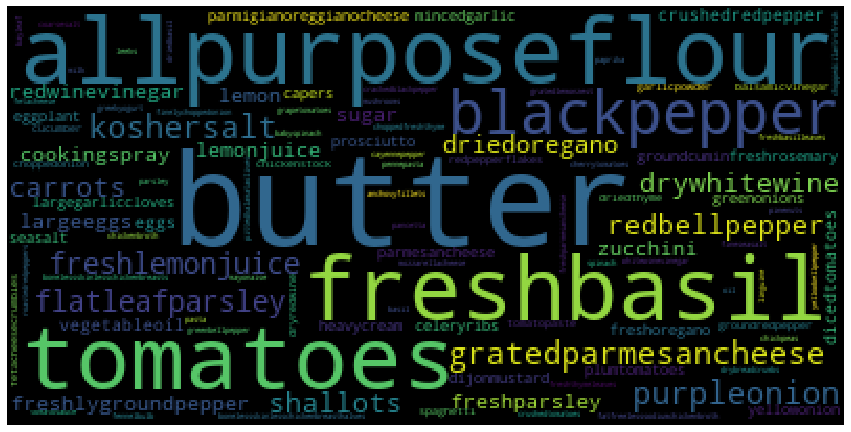

In [146]:
ingred_list = resampled_df.loc[resampled_df.cluster == 9, 'ingredients_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 10 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

salt
butter
milk
eggs
pepper
allpurposeflour
onions
sugar
flour
groundblackpepper
425


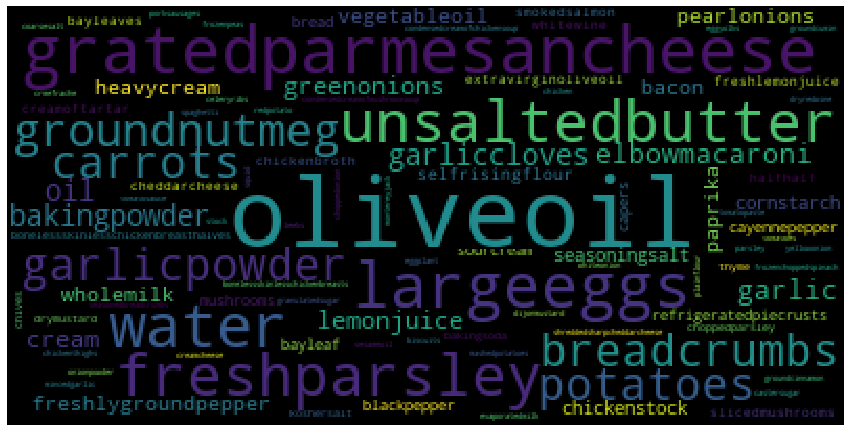

In [147]:
ingred_list = resampled_df.loc[resampled_df.cluster == 10, 'ingredients_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 10 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

salt
onions
garlic
water
oliveoil
groundblackpepper
garliccloves
pepper
vegetableoil
carrots
1471


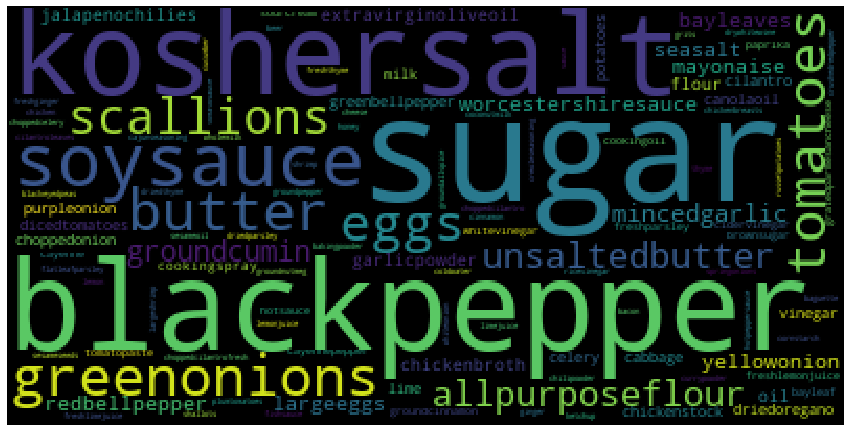

In [148]:
ingred_list = resampled_df.loc[resampled_df.cluster == 11, 'ingredients_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 10 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

cinnamonsticks
lowsodiumsoysauce
sugar
water
clove
peeledfreshginger
salt
garliccloves
staranise
blackpeppercorns
261


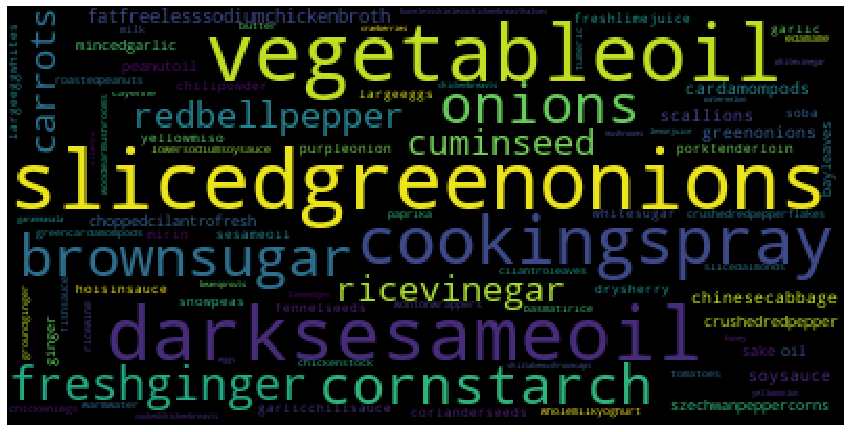

In [149]:
ingred_list = resampled_df.loc[resampled_df.cluster == 12, 'ingredients_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 10 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

254


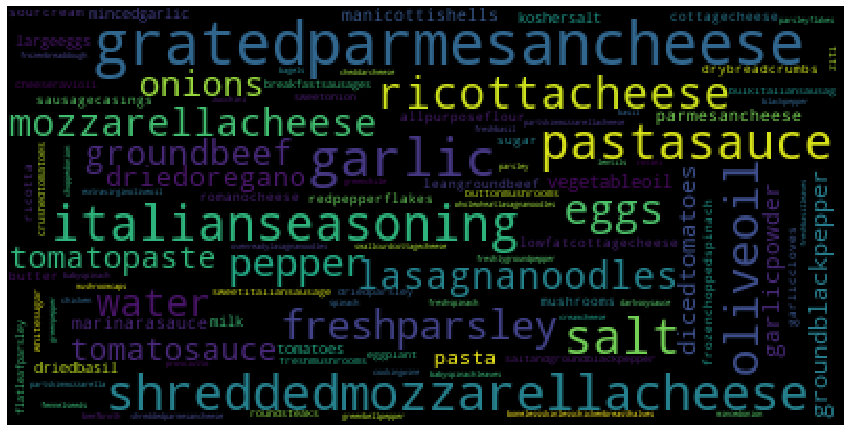

In [151]:
ingred_list = resampled_df.loc[resampled_df.cluster == 13, 'ingredients_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

salt
onions
garlic
oliveoil
greenbellpepper
water
cayennepepper
dicedtomatoes
pepper
celery
400


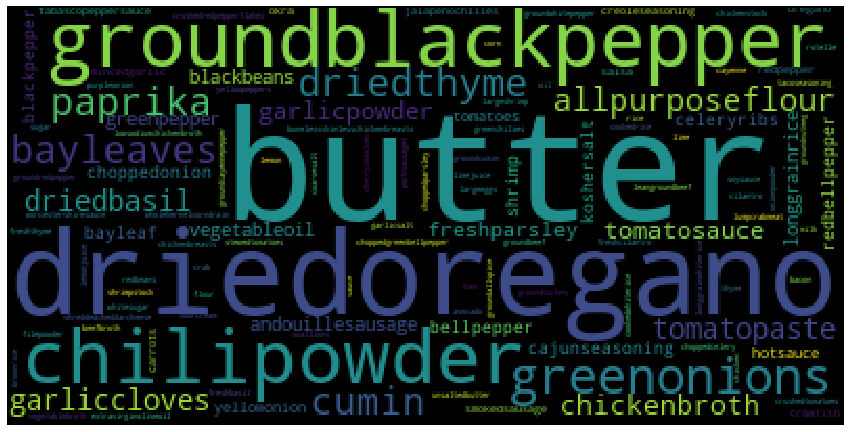

In [152]:
ingred_list = resampled_df.loc[resampled_df.cluster == 14, 'ingredients_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 10 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

salt
groundcumin
onions
garliccloves
groundcoriander
vegetableoil
oliveoil
currypowder
water
groundblackpepper
380


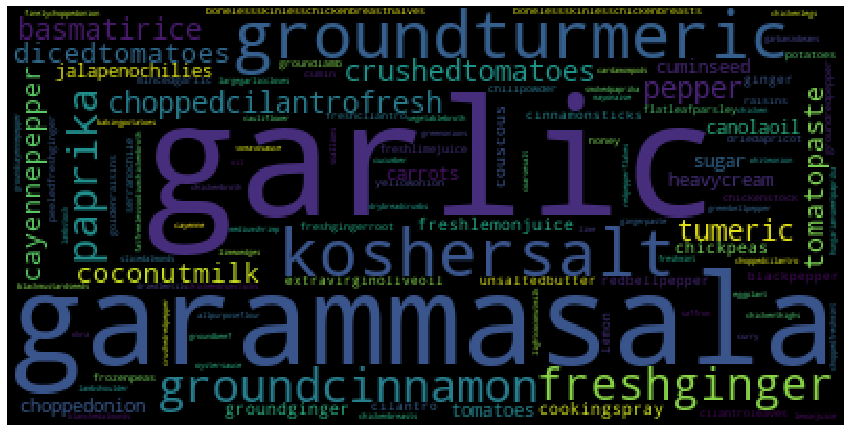

In [153]:
ingred_list = resampled_df.loc[resampled_df.cluster == 15, 'ingredients_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 10 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

salt
onions
cuminseed
water
garammasala
groundturmeric
oil
greenchilies
garlic
chilipowder
458


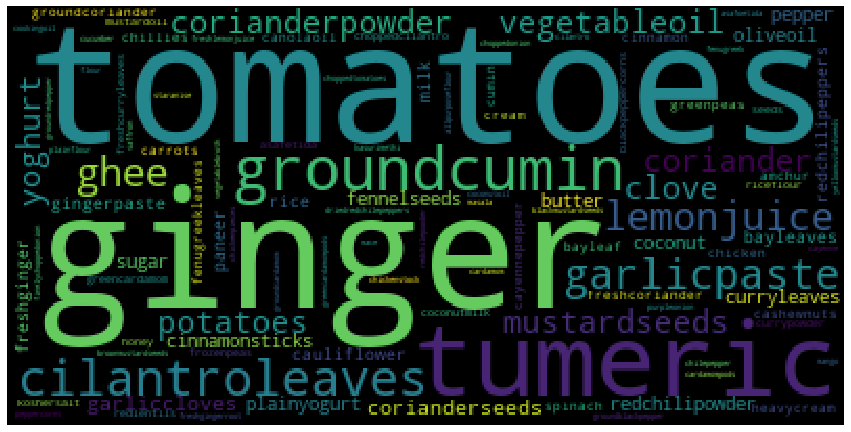

In [154]:
ingred_list = resampled_df.loc[resampled_df.cluster == 16, 'ingredients_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 10 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

366


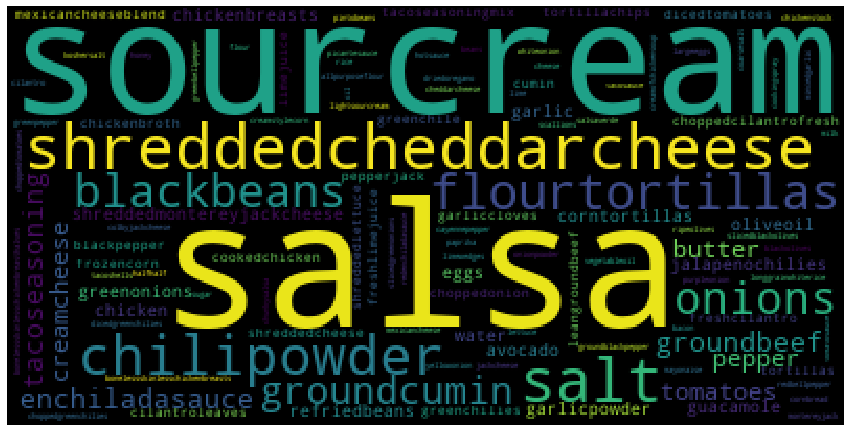

In [156]:
ingred_list = resampled_df.loc[resampled_df.cluster == 17, 'ingredients_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

salt
garliccloves
oliveoil
jalapenochilies
groundcumin
garlic
onions
avocado
choppedcilantrofresh
purpleonion
730


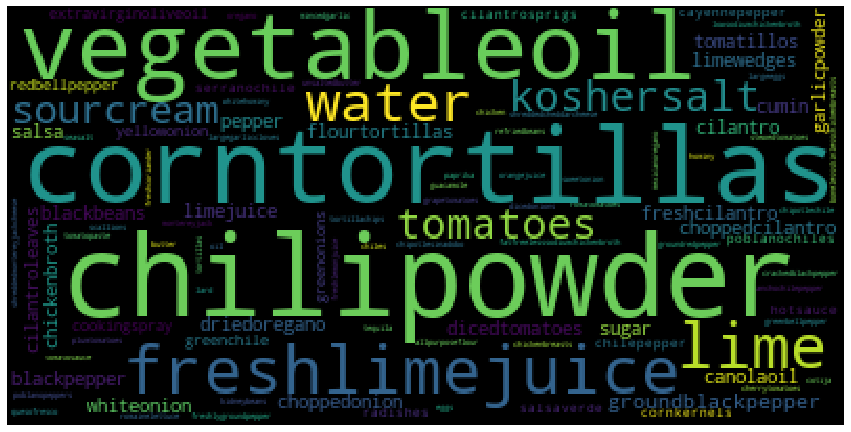

In [157]:
ingred_list = resampled_df.loc[resampled_df.cluster == 18, 'ingredients_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 10 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

### Try taking out the most common words before clustering!

In [73]:
no_space_common_ing = ['salt',
 'onions',
 'oliveoil',
 'water',
 'garlic',
 'sugar',
 'garliccloves',
 'butter',
 'groundblackpepper',
 'allpurposeflour']

space_common_ing = ['pepper',
 'salt',
 'oil',
 'garlic',
 'ground',
 'fresh',
 'sauce',
 'sugar',
 'onions',
 'cheese']

In [74]:
ingredients_df.columns

Index(['ingredients', 'ing_lower_alpha', 'ing_lower_alpha_wSpace',
       'ingredients_string', 'ingredients_string_wSpace', 'num_of_ingred'],
      dtype='object')

In [75]:
truncated_ing_list = list()
for index, row in ingredients_df.iterrows():
    temp_lst = [word for word in row['ing_lower_alpha'] if word not in no_space_common_ing]
    truncated_ing_list.append(temp_lst)


ingredients_df['trunc_ing_list_no_space'] = truncated_ing_list
ingredients_df['trunc_noSpace_string'] = ingredients_df.trunc_ing_list_no_space.str.join(' ')

In [76]:
separator = ', '
separator.join(no_space_common_ing)

'salt, onions, oliveoil, water, garlic, sugar, garliccloves, butter, groundblackpepper, allpurposeflour'

In [77]:
separator = ', '
truncated_ing_list = list()
for index, row in ingredients_df.iterrows():
    temp_lst = [word for word in row['ing_lower_alpha_wSpace'] if ((word not in separator.join(space_common_ing)) & ('salt' not in word))]
    truncated_ing_list.append(temp_lst)

ingredients_df['trunc_ing_list_wSpace'] = truncated_ing_list
ingredients_df['trunc_wSpace_string'] = ingredients_df.trunc_ing_list_wSpace.str.join(' ')

In [78]:
[word for word in ['kosher salt','cheese','onions','bread','pasta'] if ((word not in separator.join(space_common_ing)) & ('salt' not in word))]


['bread', 'pasta']

In [79]:
for index, row in ingredients_df.iterrows():
    if 'salt' in row['trunc_wSpace_string']:
        print(row['trunc_wSpace_string'])

In [93]:
vectorizer_wSpace = TfidfVectorizer()
resampled_df = pd.DataFrame(ingredients_df.sample(frac=0.1))
vectors_wSpace = vectorizer_wSpace.fit_transform(resampled_df.trunc_wSpace_string)
print(vectors_wSpace.shape)

vectors_wSpace_full = vectors_wSpace.toarray()

(3977, 1802)


In [94]:
from scipy.spatial.distance import pdist

Y = pdist(vectors_wSpace_full, 'euclidean')

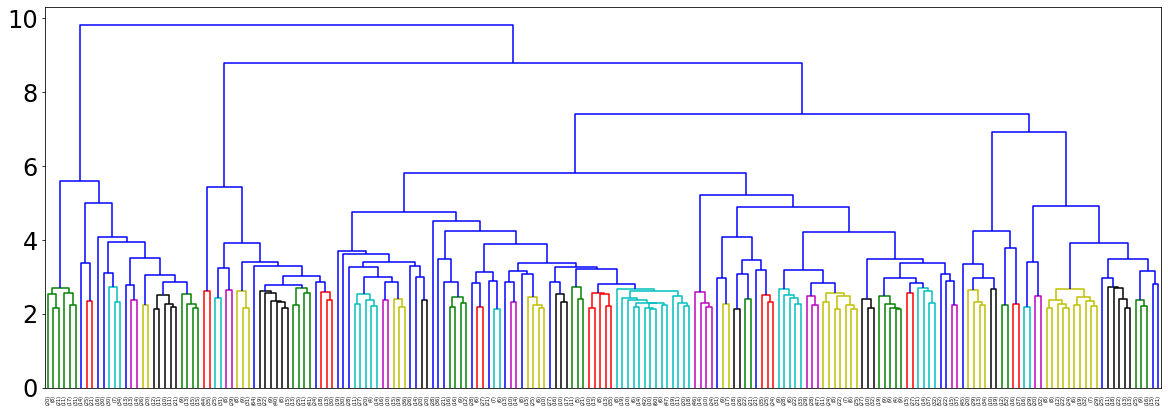

In [95]:
from scipy.cluster.hierarchy import dendrogram, ward
from matplotlib import pyplot as plt

Z = ward(Y)

# linked = linkage(vectors_wSpace_full, 'ward', optimal_ordering=True)

plt.figure(figsize=(20, 7))
dendrogram(Z,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True,
            color_threshold=2.75,
            p=200,
            truncate_mode='lastp')
plt.show()

In [96]:
Z

array([[4.00000000e+00, 3.87900000e+03, 0.00000000e+00, 2.00000000e+00],
       [4.22000000e+02, 2.35100000e+03, 0.00000000e+00, 2.00000000e+00],
       [1.64700000e+03, 2.04300000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [7.94800000e+03, 7.94900000e+03, 7.39752510e+00, 2.91700000e+03],
       [7.94600000e+03, 7.95000000e+03, 8.79887860e+00, 3.48900000e+03],
       [7.94700000e+03, 7.95100000e+03, 9.81690156e+00, 3.97700000e+03]])

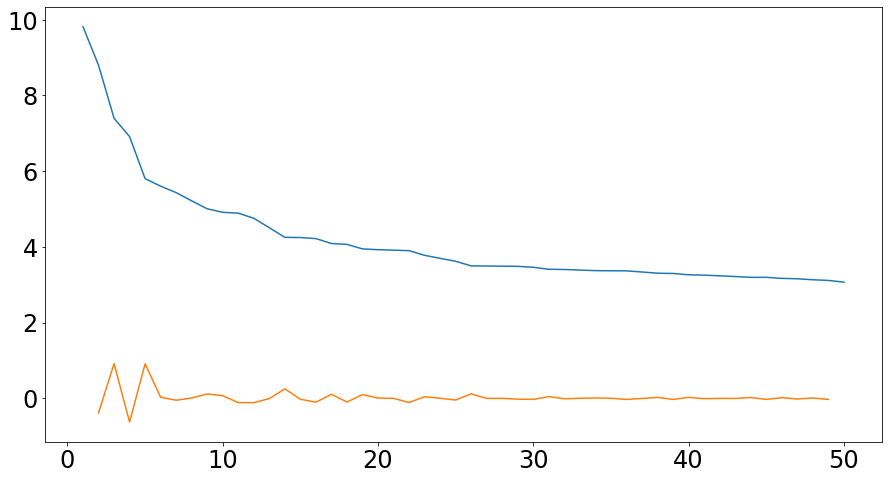

clusters: 3


In [97]:
fig = plt.figure(figsize=(15,8))

last = Z[-50:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)

plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]


plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
fig.savefig('newone.png')
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

In [98]:
from scipy.cluster.hierarchy import inconsistent

depth = 10
incons = inconsistent(Z, depth)
incons[-10:]

array([[1.29299021e+00, 4.83603987e-01, 3.66000000e+02, 7.48750082e+00],
       [1.32920561e+00, 6.13498719e-01, 2.40000000e+02, 5.99424321e+00],
       [1.44533300e+00, 5.81775460e-01, 4.59000000e+02, 6.48077199e+00],
       [1.36152785e+00, 5.53133679e-01, 3.03000000e+02, 7.36290372e+00],
       [1.30447901e+00, 6.66666282e-01, 2.83000000e+02, 6.44890818e+00],
       [1.56820157e+00, 7.15248007e-01, 5.61000000e+02, 5.91973211e+00],
       [1.32257915e+00, 5.54549402e-01, 5.17000000e+02, 1.00803666e+01],
       [1.55693998e+00, 7.66495165e-01, 7.35000000e+02, 7.61985905e+00],
       [1.61747483e+00, 8.57085403e-01, 6.91000000e+02, 8.37886603e+00],
       [1.64623409e+00, 9.89770443e-01, 6.45000000e+02, 8.25511363e+00]])

In [99]:
from scipy.cluster.hierarchy import fcluster
max_d = 2.75
clusters = fcluster(Z, 10, criterion='maxclust')
clusters

array([9, 8, 6, ..., 8, 6, 8], dtype=int32)

In [100]:
resampled_df['cluster'] = list(clusters)

In [101]:
resampled_df

ingredients  \
27396          [flour, chili powder, tumeric, oil, salt]   
176    [feta cheese, pepper, dill, olive oil, parsley...   
16036  [kosher salt, cayenne pepper, all-purpose flou...   
20585  [plum tomatoes, curry leaves, kosher salt, yel...   
34881               [rice vinegar, chili oil, soy sauce]   
...                                                  ...   
24886  [ground coriander, grated lemon zest, extra-vi...   
19066  [cold milk, cinnamon sticks, cornmeal, evapora...   
2826   [water, eggplant, olive oil, fine sea salt, la...   
38680  [boneless chicken skinless thigh, black pepper...   
10148  [marjoram, green pepper, thyme, bacon fat, bla...   

                                         ing_lower_alpha  \
27396           [flour, chilipowder, tumeric, oil, salt]   
176    [fetacheese, pepper, dill, oliveoil, parsley, ...   
16036  [koshersalt, cayennepepper, allpurposeflour, f...   
20585  [plumtomatoes, curryleaves, koshersalt, yellow...   
34881                  [ricevinegar, chilioil, soysauce]   
...                                                  ...   
24886  [groundcoriander, gratedlemonzest, extravirgin...   
19066  [coldmilk, cinnamonsticks, cornmeal, evaporate...   
2826   [water, eggplant, oliveoil, fineseasalt, large...   
38680  [bonelesschickenskinlessthigh, blackpepper, ch...   
10148  [marjoram, greenpepper, thyme, baconfat, black...   

                                  ing_lower_alpha_wSpace  \
27396          [flour, chili powder, tumeric, oil, salt]   
176    [feta cheese, pepper, dill, olive oil, parsley...   
16036  [kosher salt, cayenne pepper, allpurpose flour...   
20585  [plum tomatoes, curry leaves, kosher salt, yel...   
34881               [rice vinegar, chili oil, soy sauce]   
...                                                  ...   
24886  [ground coriander, grated lemon zest, extravir...   
19066  [cold milk, cinnamon sticks, cornmeal, evapora...   
2826   [water, eggplant, olive oil, fine sea salt, la...   
38680  [boneless chicken skinless thigh, black pepper...   
10148  [marjoram, green pepper, thyme, bacon fat, bla...   

                                      ingredients_string  \
27396                 flour chilipowder tumeric oil salt   
176    fetacheese pepper dill oliveoil parsley onions...   
16036  koshersalt cayennepepper allpurposeflour fresh...   
20585  plumtomatoes curryleaves koshersalt yellowonio...   
34881                      ricevinegar chilioil soysauce   
...                                                  ...   
24886  groundcoriander gratedlemonzest extravirginoli...   
19066  coldmilk cinnamonsticks cornmeal evaporatedmil...   
2826   water eggplant oliveoil fineseasalt largeeggs ...   
38680  bonelesschickenskinlessthigh blackpepper chick...   
10148  marjoram greenpepper thyme baconfat blackpeppe...   

                               ingredients_string_wSpace  num_of_ingred  \
27396                flour chili powder tumeric oil salt              5   
176    feta cheese pepper dill olive oil parsley onio...             12   
16036  kosher salt cayenne pepper allpurpose flour fr...              8   
20585  plum tomatoes curry leaves kosher salt yellow ...             11   
34881                   rice vinegar chili oil soy sauce              3   
...                                                  ...            ...   
24886  ground coriander grated lemon zest extravirgin...             10   
19066  cold milk cinnamon sticks cornmeal evaporated ...              9   
2826   water eggplant olive oil fine sea salt large e...              7   
38680  boneless chicken skinless thigh black pepper c...             10   
10148  marjoram green pepper thyme bacon fat black pe...              8   

                                 trunc_ing_list_no_space  \
27396                 [flour, chilipowder, tumeric, oil]   
176    [fetacheese, pepper, dill, parsley, spinach, r...   
16036  [koshersalt, cayennepepper, freshthymeleaves, ...   
20585  [plumtomatoes

In [102]:
resampled_df.cluster.value_counts()

6     1139
8      945
5      493
10     452
3      320
9      287
1      108
7       94
4       79
2       60
Name: cluster, dtype: int64

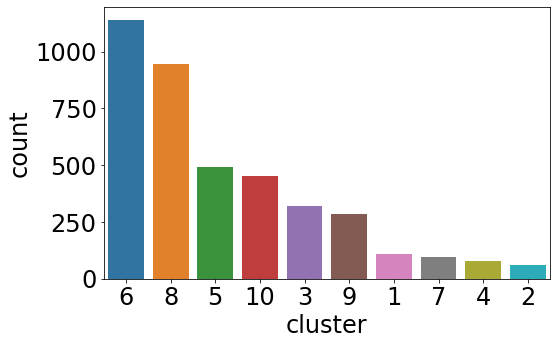

In [103]:
fig = plt.figure(figsize=(8,5))
sns.countplot(resampled_df.cluster, order=resampled_df.cluster.value_counts().index)
fig.savefig('newone3.png')

263


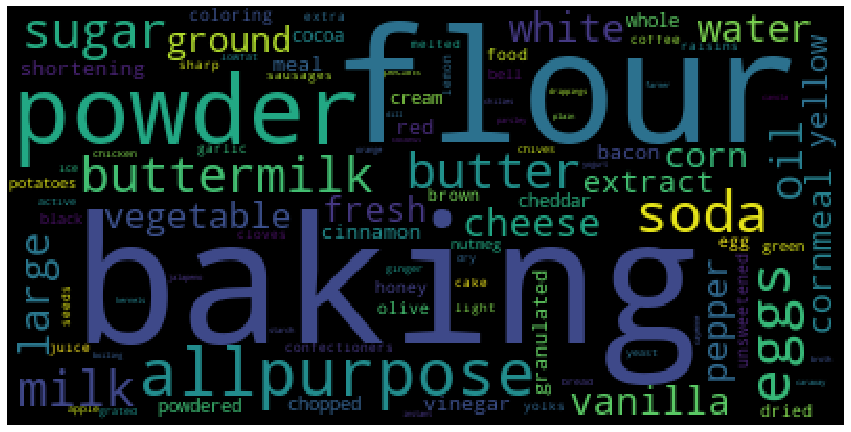

In [110]:
ingred_list = resampled_df.loc[resampled_df.cluster == 1, 'trunc_wSpace_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

183


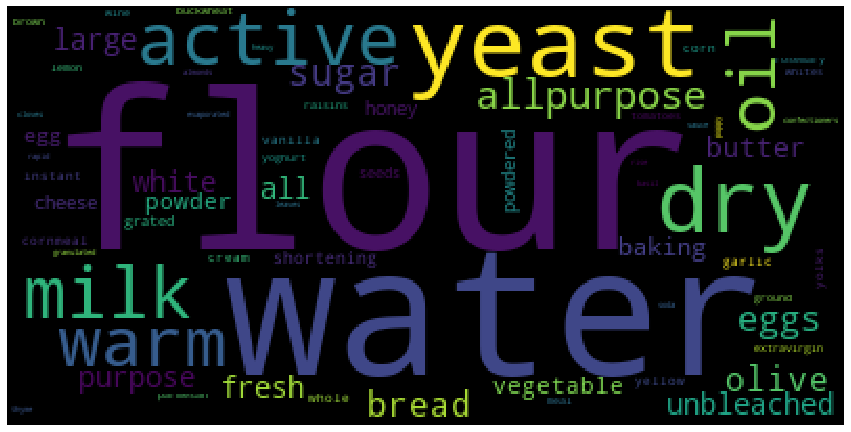

In [111]:
ingred_list = resampled_df.loc[resampled_df.cluster == 2, 'trunc_wSpace_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

523


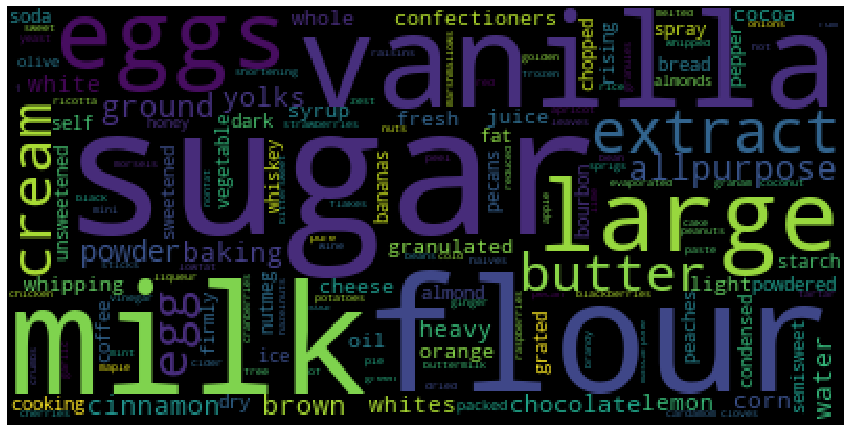

In [106]:
ingred_list = resampled_df.loc[resampled_df.cluster == 3, 'trunc_wSpace_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

254


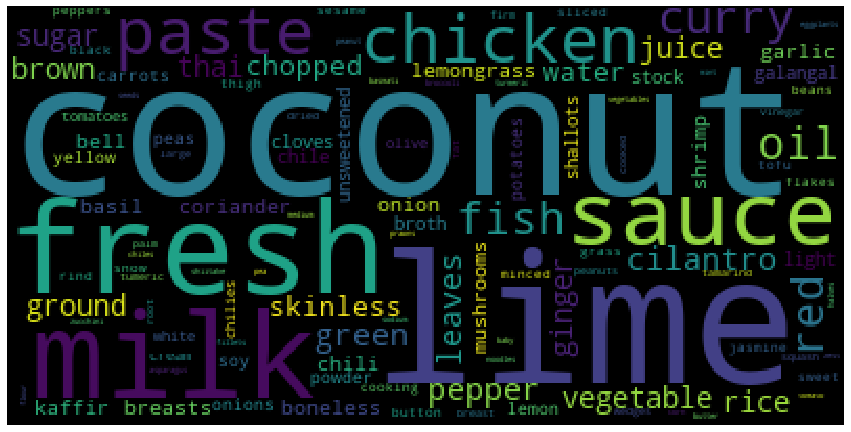

In [112]:
ingred_list = resampled_df.loc[resampled_df.cluster == 4, 'trunc_wSpace_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

645


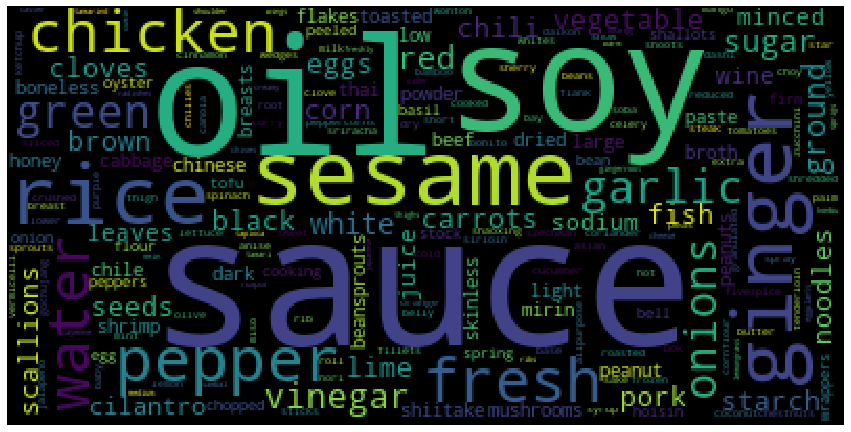

In [113]:
ingred_list = resampled_df.loc[resampled_df.cluster == 5, 'trunc_wSpace_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

1211


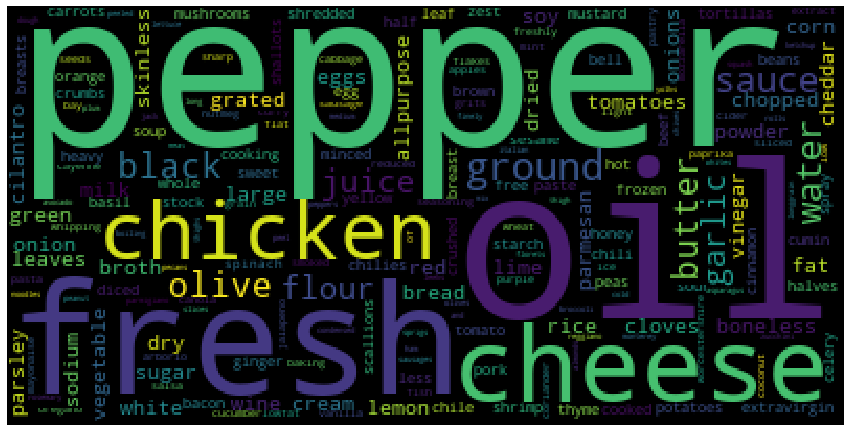

In [114]:
ingred_list = resampled_df.loc[resampled_df.cluster == 6, 'trunc_wSpace_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

286


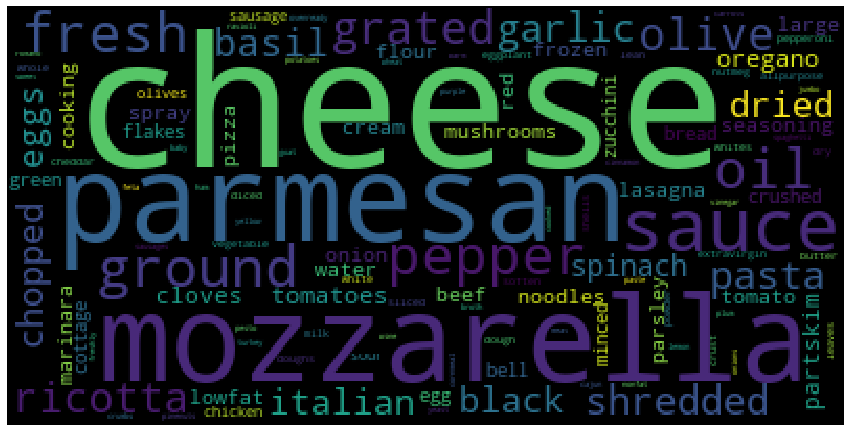

In [117]:
ingred_list = resampled_df.loc[resampled_df.cluster == 7, 'trunc_wSpace_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

925


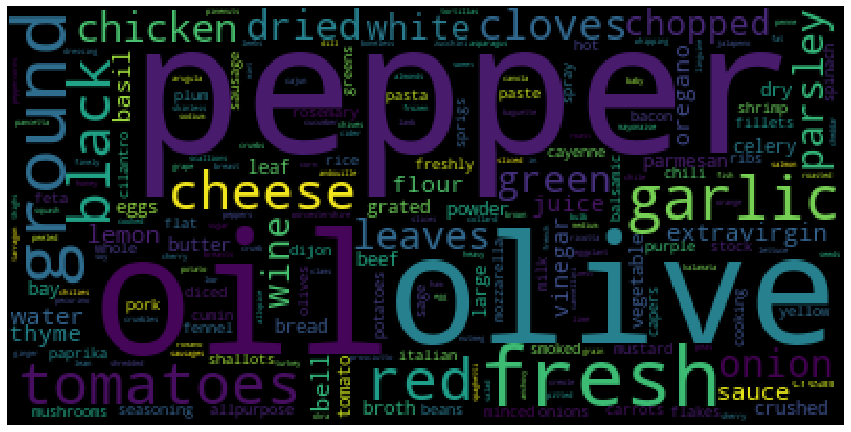

In [118]:
ingred_list = resampled_df.loc[resampled_df.cluster == 8, 'trunc_wSpace_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

488


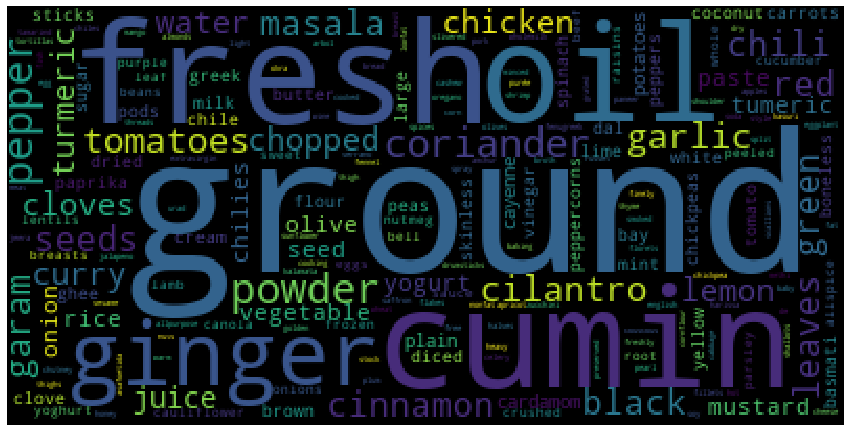

In [119]:
ingred_list = resampled_df.loc[resampled_df.cluster == 9, 'trunc_wSpace_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

568


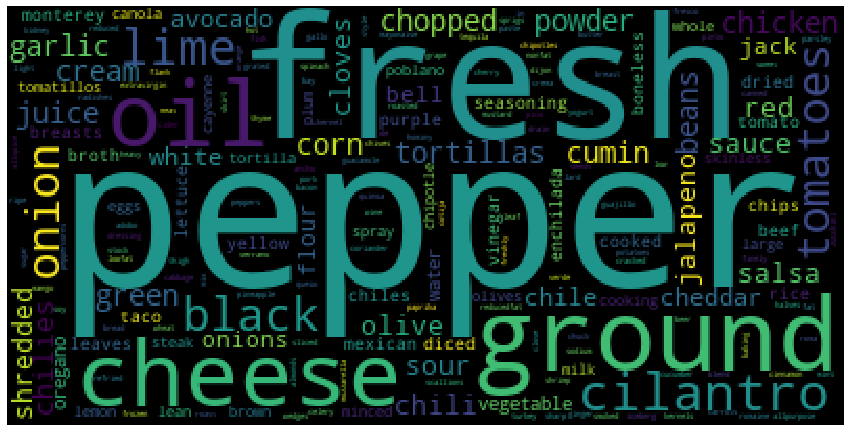

In [120]:
ingred_list = resampled_df.loc[resampled_df.cluster == 10, 'trunc_wSpace_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

# Do it for no spaces!

In [121]:
vectorizer_wSpace = TfidfVectorizer()
resampled_df = pd.DataFrame(ingredients_df.sample(frac=0.1))
vectors_wSpace = vectorizer_wSpace.fit_transform(resampled_df.trunc_noSpace_string)
print(vectors_wSpace.shape)

vectors_wSpace_full = vectors_wSpace.toarray()

(3977, 3201)


In [122]:
from scipy.spatial.distance import pdist

Y = pdist(vectors_wSpace_full, 'euclidean')

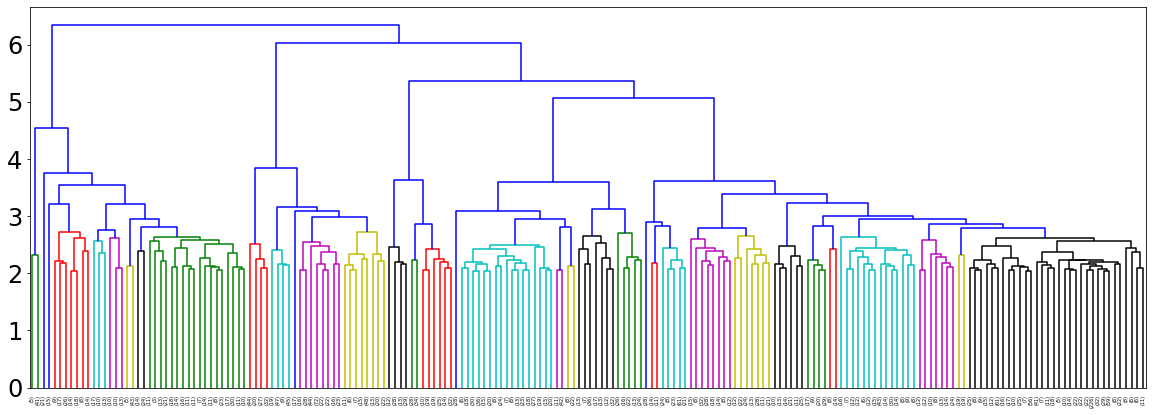

In [123]:
from scipy.cluster.hierarchy import dendrogram, ward
from matplotlib import pyplot as plt

Z = ward(Y)

# linked = linkage(vectors_wSpace_full, 'ward', optimal_ordering=True)

plt.figure(figsize=(20, 7))
dendrogram(Z,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True,
            color_threshold=2.75,
            p=200,
            truncate_mode='lastp')
plt.show()

In [124]:
Z

array([[7.68000000e+02, 1.99100000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.68800000e+03, 3.97700000e+03, 0.00000000e+00, 3.00000000e+00],
       [3.27000000e+02, 1.50000000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [7.94500000e+03, 7.94900000e+03, 5.36906024e+00, 2.73600000e+03],
       [7.94700000e+03, 7.95000000e+03, 6.03473757e+00, 3.38100000e+03],
       [7.94800000e+03, 7.95100000e+03, 6.34049221e+00, 3.97700000e+03]])

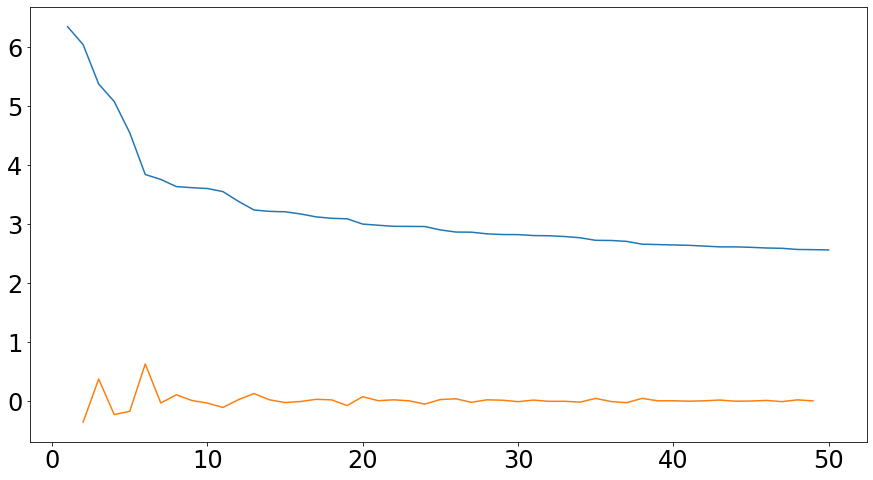

clusters: 6


In [125]:
fig = plt.figure(figsize=(15,8))

last = Z[-50:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)

plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]


plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

In [126]:
from scipy.cluster.hierarchy import inconsistent

depth = 10
incons = inconsistent(Z, depth)
incons[-10:]

array([[1.41040073e+00, 3.97668927e-01, 4.04000000e+02, 5.50110058e+00],
       [1.49120326e+00, 4.67757942e-01, 4.60000000e+02, 4.53332648e+00],
       [1.33564262e+00, 3.58190609e-01, 2.39000000e+02, 6.40731999e+00],
       [1.40936317e+00, 5.55968765e-01, 2.65000000e+02, 4.21306284e+00],
       [1.42636964e+00, 3.99690573e-01, 3.53000000e+02, 6.02634527e+00],
       [1.42944069e+00, 6.12683939e-01, 2.34000000e+02, 5.08154793e+00],
       [1.52380534e+00, 4.97763407e-01, 6.06000000e+02, 7.12956228e+00],
       [1.53749058e+00, 5.34584068e-01, 5.96000000e+02, 7.16738467e+00],
       [1.57896628e+00, 5.71940986e-01, 6.40000000e+02, 7.79061371e+00],
       [1.64570431e+00, 6.85258363e-01, 5.67000000e+02, 6.85112092e+00]])

In [127]:
from scipy.cluster.hierarchy import fcluster
max_d = 2.75
clusters = fcluster(Z, 10, criterion='maxclust')
clusters

array([ 5,  9,  8, ...,  6,  8, 10], dtype=int32)

In [128]:
resampled_df['cluster'] = list(clusters)

In [129]:
resampled_df

ingredients  \
28144  [cherry preserves, bananas, honey, white sandw...   
5957   [parmesan cheese, sugar, swiss chard, red bell...   
23576  [ground beef, taco seasoning mix, refrigerated...   
23956  [unsalted butter, dark rum, salt, pineapple, v...   
1691   [all-purpose flour, warm water, confectioners ...   
...                                                  ...   
37585  [olive oil, ground black pepper, rosemary spri...   
18862  [cheese, prebaked pizza crusts, chicken-apple ...   
30488  [ginger, garlic, tomatoes, red kidney beans, b...   
22792  [hamburger buns, tomatoes, white onion, beef s...   
17953          [garlic, water, kale, miso, green onions]   

                                         ing_lower_alpha  \
28144  [cherrypreserves, bananas, honey, whitesandwic...   
5957   [parmesancheese, sugar, swisschard, redbellpep...   
23576  [groundbeef, tacoseasoningmix, refrigeratedcre...   
23956  [unsaltedbutter, darkrum, salt, pineapple, van...   
1691   [allpurposeflour, warmwater, confectionerssuga...   
...                                                  ...   
37585  [oliveoil, groundblackpepper, rosemarysprigs, ...   
18862  [cheese, prebakedpizzacrusts, chickenapplesaus...   
30488  [ginger, garlic, tomatoes, redkidneybeans, bay...   
22792  [hamburgerbuns, tomatoes, whiteonion, beefsirl...   
17953           [garlic, water, kale, miso, greenonions]   

                                  ing_lower_alpha_wSpace  \
28144  [cherry preserves, bananas, honey, white sandw...   
5957   [parmesan cheese, sugar, swiss chard, red bell...   
23576  [ground beef, taco seasoning mix, refrigerated...   
23956  [unsalted butter, dark rum, salt, pineapple, v...   
1691   [allpurpose flour, warm water, confectioners s...   
...                                                  ...   
37585  [olive oil, ground black pepper, rosemary spri...   
18862  [cheese, prebaked pizza crusts, chickenapple s...   
30488  [ginger, garlic, tomatoes, red kidney beans, b...   
22792  [hamburger buns, tomatoes, white onion, beef s...   
17953          [garlic, water, kale, miso, green onions]   

                                      ingredients_string  \
28144  cherrypreserves bananas honey whitesandwichbre...   
5957   parmesancheese sugar swisschard redbellpepper ...   
23576  groundbeef tacoseasoningmix refrigeratedcresce...   
23956  unsaltedbutter darkrum salt pineapple vanillai...   
1691   allpurposeflour warmwater confectionerssugar a...   
...                                                  ...   
37585  oliveoil groundblackpepper rosemarysprigs panc...   
18862  cheese prebakedpizzacrusts chickenapplesausage...   
30488  ginger garlic tomatoes redkidneybeans bayleave...   
22792  hamburgerbuns tomatoes whiteonion beefsirloin ...   
17953                 garlic water kale miso greenonions   

                               ingredients_string_wSpace  num_of_ingred  \
28144  cherry preserves bananas honey white sandwich ...              6   
5957   parmesan cheese sugar swiss chard red bell pep...             16   
23576  ground beef taco seasoning mix refrigerated cr...              5   
23956  unsalted butter dark rum salt pineapple vanill...             10   
1691   allpurpose flour warm water confectioners suga...             15   
...                                                  ...            ...   
37585  olive oil ground black pepper rosemary sprigs ...             15   
18862  cheese prebaked pizza crusts chickenapple saus...              8   
30488  ginger garlic tomatoes red kidney beans bay le...             13   
22792  hamburger buns tomatoes white onion beef sirlo...             11   
17953                garlic water kale miso green onions              5   

                                 trunc_ing_list_no_space  \
28144  [cherrypreserves, bananas, honey, whitesandwic...   
5957   [parmesancheese, swisschard, redbellpepper, wh...   
23576  [groundbeef, tacoseasoningmix, refrigeratedcre...   
23956  [unsaltedbutt

In [130]:
resampled_df.cluster.value_counts()

10    1634
8      649
3      529
5      522
9      190
7      181
4      123
6       82
1       46
2       21
Name: cluster, dtype: int64

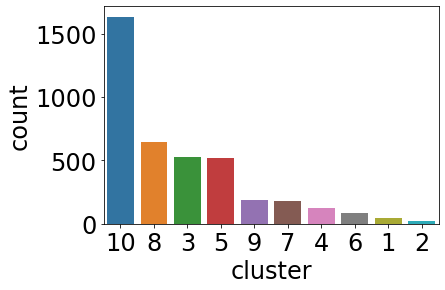

In [131]:
sns.countplot(resampled_df.cluster, order=resampled_df.cluster.value_counts().index)

94


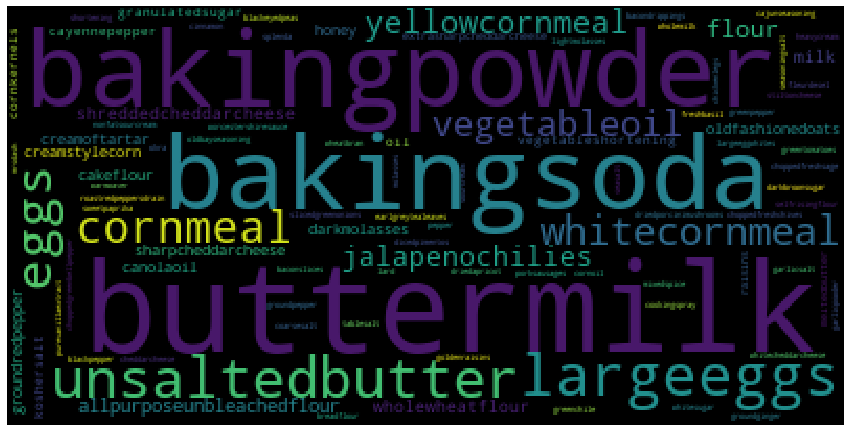

In [142]:
ingred_list = resampled_df.loc[resampled_df.cluster == 1, 'trunc_noSpace_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

67


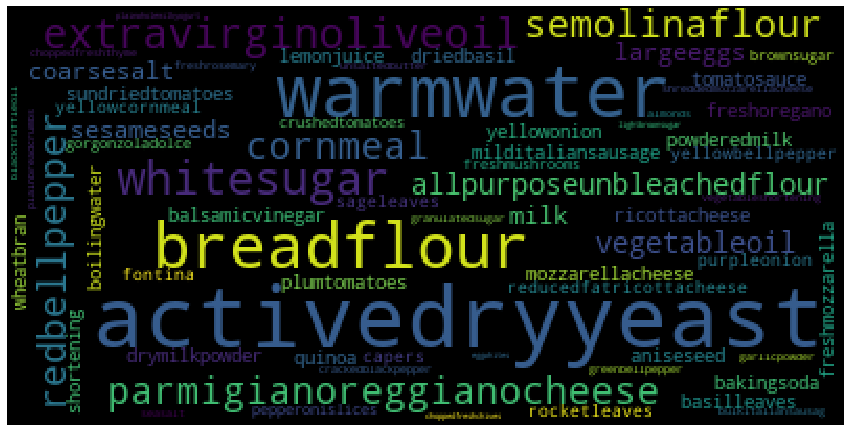

In [133]:
ingred_list = resampled_df.loc[resampled_df.cluster == 2, 'trunc_noSpace_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

857


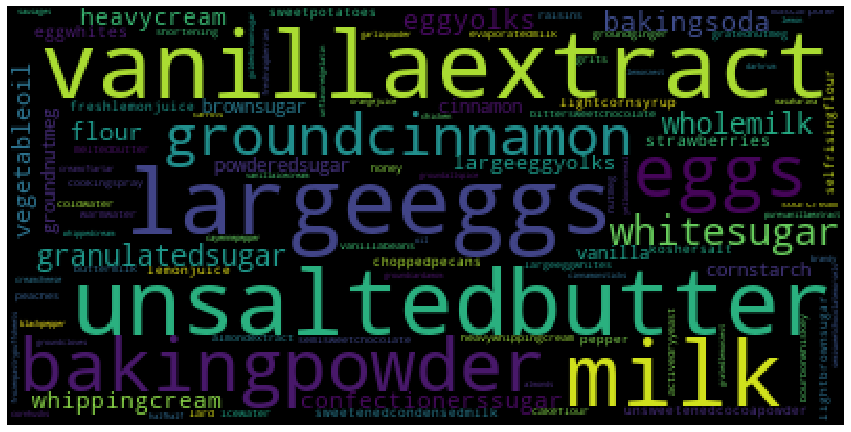

In [134]:
ingred_list = resampled_df.loc[resampled_df.cluster == 3, 'trunc_noSpace_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

408


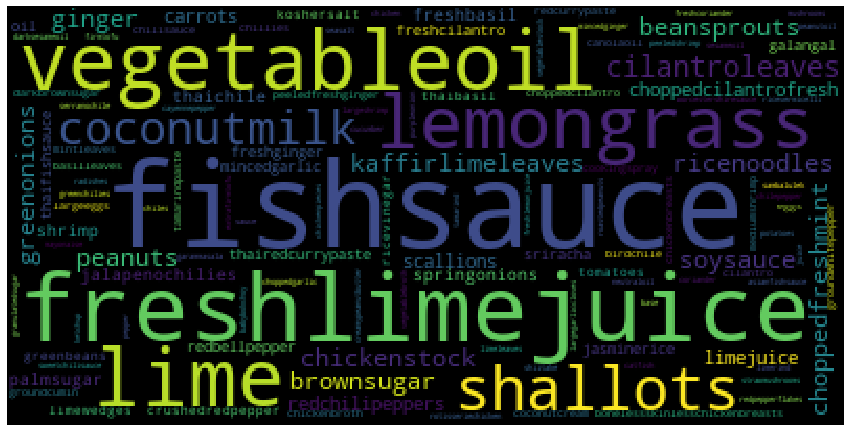

In [143]:
ingred_list = resampled_df.loc[resampled_df.cluster == 4, 'trunc_noSpace_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

957


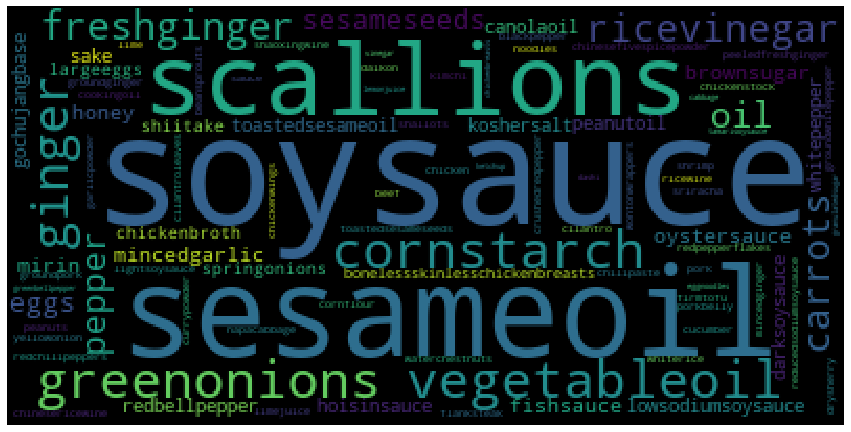

In [136]:
ingred_list = resampled_df.loc[resampled_df.cluster == 5, 'trunc_noSpace_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

226


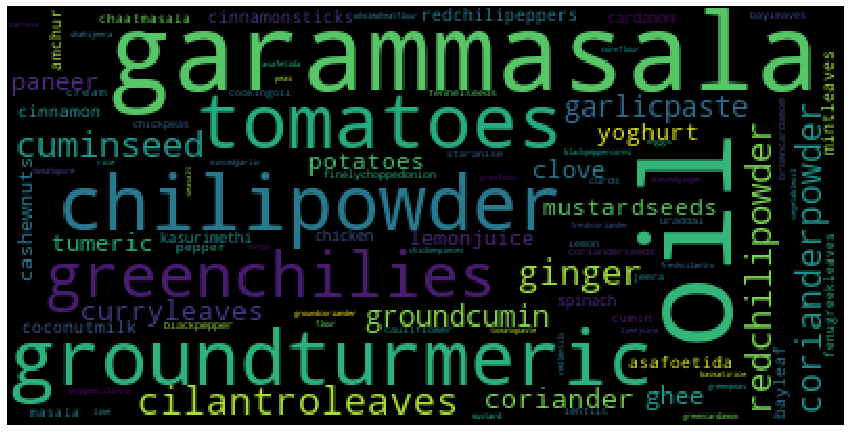

In [137]:
ingred_list = resampled_df.loc[resampled_df.cluster == 6, 'trunc_noSpace_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

532


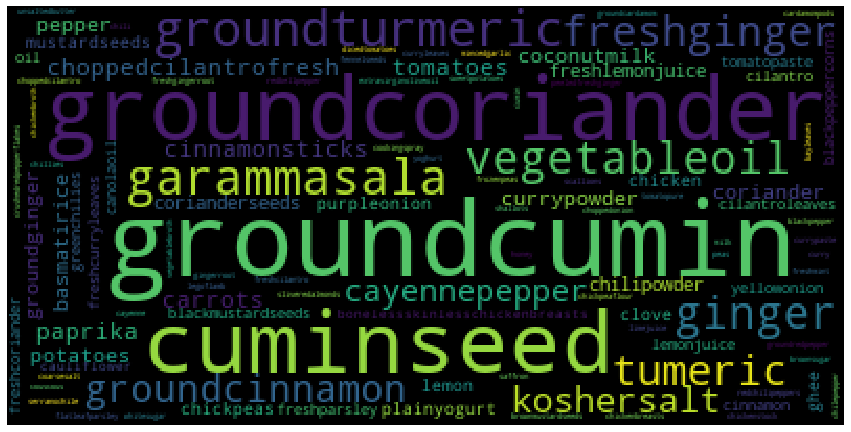

In [144]:
ingred_list = resampled_df.loc[resampled_df.cluster == 7, 'trunc_noSpace_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

1122


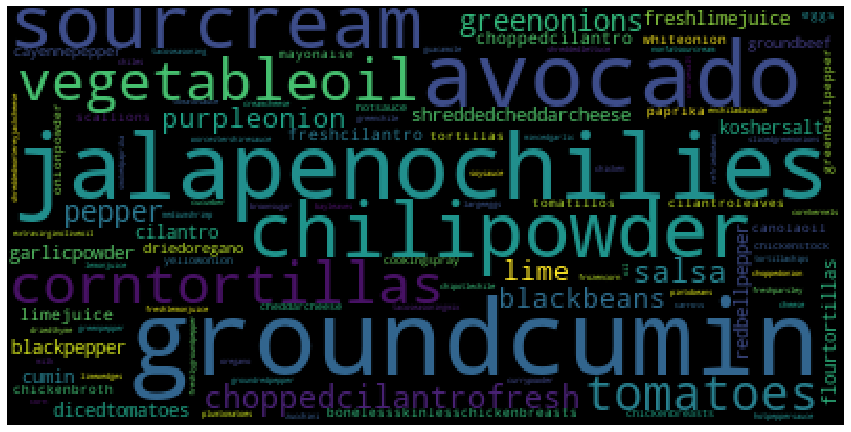

In [139]:
ingred_list = resampled_df.loc[resampled_df.cluster == 8, 'trunc_noSpace_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

466


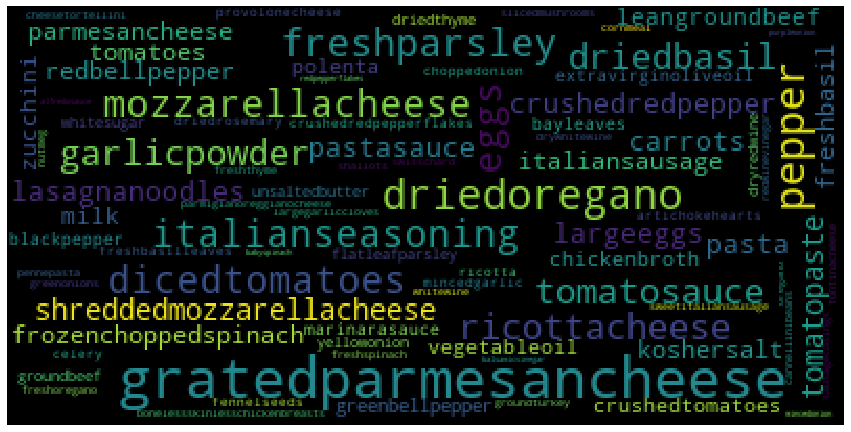

In [140]:
ingred_list = resampled_df.loc[resampled_df.cluster == 9, 'trunc_noSpace_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')

2098


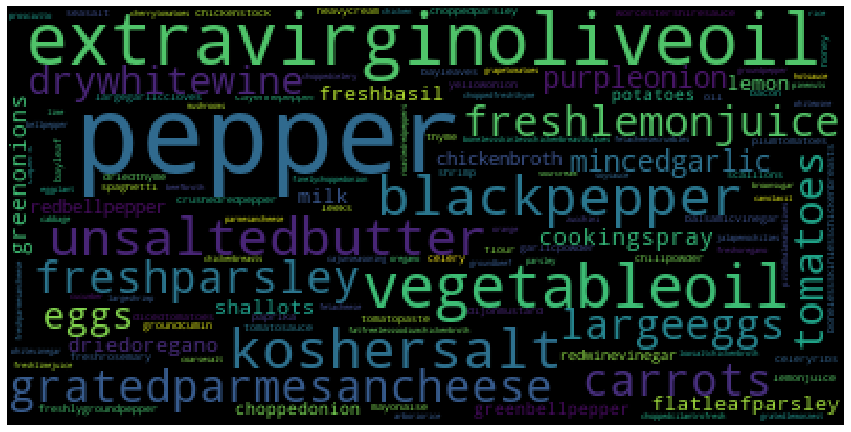

In [141]:
ingred_list = resampled_df.loc[resampled_df.cluster == 10, 'trunc_noSpace_string'].str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(ingred_list)
frequency_dist = nltk.FreqDist(tokens)
vocabulary = set(tokens)

n = 0 #top most common words to remove from vocab
for i in range(n):
    word = frequency_dist.most_common(n)[i][0]
    print(word)
    vocabulary.remove(word)


tokens = [word for word in tokens if word in vocabulary]
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
fig = plt.figure(figsize=(15,8))
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('WordCloud_wSpace.png')